In [1]:
import warnings
warnings.filterwarnings("ignore")

from rearrangements import *

In [2]:
#setting color scheme for this notebook

devstage_map = {
                "96hAEL":"96hAEL",
                "120hAEL":"120hAEL",
                "upcrawling":"wL3",
                "whitePupa":"0hAPF",
                "2hAPF":"2hAPF",
                "4hAPF":"4hAPF",
                "6hAPF":"6hAPF",
               }

color_dict = {
              '96hAEL':'#f1ef81',
              '120hAEL':'#efa636',
              'wL3':'#414243',
              '0hAPF':'#7d99cd', 
              '2hAPF':'#64a9dd', 
              '4hAPF':'#78cfdb',
              '6hAPF':'#71c382',
              'DV' : 'purple',
              'outDV' : 'green',
             }

columns = ['devstage', 'discName', 'region', 'k_dist', 
           'area','neighbour_number','elongation_tensor_norm_max', 
           'Qrr_geom_inPlane', 'Qphiphi', 'Qnn', 'Qrphi', 'Qrn', 'Qphin',
           'countInBin', 'cumcount',
           'k_dist_pathlength', #'k_dist_pathlength_poly' 
          ]

rois = ['outDV', 'DV']
devstages = ["96hAEL","wL3","0hAPF","2hAPF","4hAPF","6hAPF",]

genotype = 'ecadGFPnbG4myoVI'

In [3]:
df = pd.read_pickle('data/DFallDiscsIncreaselimitcounts.pkl')
#df = df[df['genotype'] == 'ecadGFPnbG4']
df = df[df['genotype'] == genotype]
df["devstage"] = [devstage_map[x] for x in df["devstage"].values]
df = df[columns]

In [4]:
df.head(3)

,devstage,discName,region,k_dist,area,neighbour_number,elongation_tensor_norm_max,Qrr_geom_inPlane,Qphiphi,Qnn,Qrphi,Qrn,Qphin,countInBin,cumcount,k_dist_pathlength
6730,96hAEL,20210813_ecadGFPnbG4myoVI_96hAEL_disc3_outDV,outDV,10,5.082418,5,0.163885,-0.005841,0.005859,-0.000018,-0.163685,-0.002357,0.002967,34.0,192.0,29.127047
6731,96hAEL,20210813_ecadGFPnbG4myoVI_96hAEL_disc3_outDV,outDV,10,5.089899,6,0.187449,-0.007070,0.007204,-0.000134,-0.187242,0.002890,0.001601,34.0,192.0,26.530145
6732,96hAEL,20210813_ecadGFPnbG4myoVI_96hAEL_disc3_outDV,outDV,10,2.928053,5,0.453948,0.222374,-0.222133,-0.000241,-0.395608,0.002341,-0.006613,34.0,192.0,26.351279


### For each disc, compute average quantities in rings

In [5]:
groupby_cols = ['devstage', 'region', 'discName', 'k_dist']
#here we pool cells within a ring and calculate the mean and std
df_pool_k = df.groupby(groupby_cols).agg('mean').reset_index() 
#we offset k_dist values if the rings do not start with k_dits = 0
k_dist_offset = df.groupby(['discName']).k_dist.agg('min')#.reset_index().set_index('discName') #some discs can have k starting from non-zero value, so we offset them by the starting k
df_pool_k['k_dist'] = df_pool_k['k_dist'] - k_dist_offset[df_pool_k['discName'].values].values #offsetting k values


#scale pathlength
pathlength_max = df_pool_k.groupby(['discName']).k_dist_pathlength.agg('max')
df_pool_k['pathlength_scaled'] = df_pool_k['k_dist_pathlength']/pathlength_max[df_pool_k['discName'].values].values

In [6]:
df_pool_k

,devstage,region,discName,k_dist,area,neighbour_number,elongation_tensor_norm_max,Qrr_geom_inPlane,Qphiphi,Qnn,Qrphi,Qrn,Qphin,countInBin,cumcount,k_dist_pathlength,pathlength_scaled
0,0hAPF,DV,20200706_ecadGFPnbG4myoVI_whitePupa_disc1_DV,0,3.061568,5.000000,0.249922,0.210805,-0.210387,-0.000418,-0.065571,0.009105,-0.003149,2.000000,2.000000,0.000000,0.000000
1,0hAPF,DV,20200706_ecadGFPnbG4myoVI_whitePupa_disc1_DV,1,6.454322,6.000000,0.315932,-0.050251,0.050744,-0.000493,-0.025608,-0.002781,0.002546,3.000000,5.000000,2.334126,0.036721
2,0hAPF,DV,20200706_ecadGFPnbG4myoVI_whitePupa_disc1_DV,2,5.459215,6.250000,0.264645,0.127112,-0.125734,-0.001378,-0.136581,-0.000491,0.002735,4.000000,9.000000,5.093696,0.080135
3,0hAPF,DV,20200706_ecadGFPnbG4myoVI_whitePupa_disc1_DV,3,5.531461,5.750000,0.369078,0.110075,-0.108951,-0.001124,-0.103839,-0.003013,0.003220,8.000000,17.000000,8.005867,0.125949
4,0hAPF,DV,20200706_ecadGFPnbG4myoVI_whitePupa_disc1_DV,4,5.282776,5.909091,0.252994,0.067989,-0.067140,-0.000849,-0.057810,-0.003922,0.001688,11.000000,28.000000,11.065548,0.174084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,wL3,outDV,20210125_ecadGFPnbG4myoVI_upcrawling_disc2_outDV,15,7.277205,5.944954,0.151530,0.020584,-0.020293,-0.000292,0.005209,0.000760,0.000720,54.541284,439.990826,46.851344,0.777962
1335,wL3,outDV,20210125_ecadGFPnbG4myoVI_upcrawling_disc2_outDV,16,7.617043,6.017857,0.174884,0.030928,-0.030408,-0.000520,-0.001876,0.001271,-0.000323,56.017857,496.187500,50.065899,0.831340
1336,wL3,outDV,20210125_ecadGFPnbG4myoVI_upcrawling_disc2_outDV,17,7.728023,5.896000,0.168633,0.025582,-0.025315,-0.000267,-0.016099,0.000471,-0.000062,62.504000,559.144000,54.010727,0.896843
1337,wL3,outDV,20210125_ecadGFPnbG4myoVI_upcrawling_disc2_outDV,18,7.984222,6.050000,0.185940,0.025210,-0.024721,-0.000489,0.022033,-0.000807,-0.000151,60.000000,601.000000,56.659511,0.940826


In [7]:
#compute Qnorm

#function to compute area weighted average
wm = lambda x: np.average(x, weights=df.loc[x.index, "area"])

df_pool_areaWeighted_k = df.groupby(groupby_cols).agg(Qrr_geom_inPlane = pd.NamedAgg(column = 'Qrr_geom_inPlane', aggfunc = wm),
                                                      Qrphi = pd.NamedAgg(column = 'Qrphi', aggfunc = wm),
                                                      Qphiphi = pd.NamedAgg(column = 'Qphiphi', aggfunc = wm),
                                                     ).reset_index() 
df_pool_k[["Qrr_geom_inPlane", "Qrphi", "Qphiphi"]] = df_pool_areaWeighted_k[["Qrr_geom_inPlane", "Qrphi", "Qphiphi"]]

df_pool_k['Qnorm'] = np.sqrt(df_pool_k['Qrr_geom_inPlane']**2 + df_pool_k['Qrphi']**2)
df_pool_k['exp_signed_Qnorm'] = np.exp(np.sign(df_pool_k['Qrr_geom_inPlane'])*df_pool_k['Qnorm'])

### For each developmental stage, average over discs

In [8]:
groupby_cols = ['devstage', 'region', 'k_dist']
#here we pool discs within a devstage and calculate the mean and std
df_pool_devstage = df_pool_k.groupby(groupby_cols).agg(['mean', 'std']).reset_index()
colnames = [x[0]+'_'+x[1] if x[0] not in groupby_cols else x[0] for x in df_pool_devstage.columns]
df_pool_devstage.columns = colnames #removing multi-indexing

df_pool_devstage.head()

,devstage,region,k_dist,area_mean,area_std,neighbour_number_mean,neighbour_number_std,elongation_tensor_norm_max_mean,elongation_tensor_norm_max_std,Qrr_geom_inPlane_mean,...,cumcount_mean,cumcount_std,k_dist_pathlength_mean,k_dist_pathlength_std,pathlength_scaled_mean,pathlength_scaled_std,Qnorm_mean,Qnorm_std,exp_signed_Qnorm_mean,exp_signed_Qnorm_std
0,0hAPF,DV,0,6.966896,2.305946,5.794444,0.721239,0.265535,0.106269,0.068831,...,2.827778,1.529040,0.502283,1.230336,0.008476,0.020763,0.139461,0.062252,1.092937,0.148131
1,0hAPF,DV,1,6.686276,0.783307,5.669841,0.336551,0.254658,0.043969,-0.030260,...,7.511111,2.437363,3.248640,1.285400,0.049013,0.024283,0.057811,0.043010,0.946462,0.043782
2,0hAPF,DV,2,7.199627,1.384009,5.975522,0.276774,0.223614,0.039674,0.052170,...,13.347630,3.605589,6.201989,1.141459,0.092536,0.024758,0.076270,0.074713,1.075621,0.090743
3,0hAPF,DV,3,7.293139,1.266675,5.785866,0.178096,0.259012,0.056377,0.062640,...,20.895752,2.948269,9.513961,1.019309,0.141178,0.024350,0.121461,0.051970,1.078795,0.126255
4,0hAPF,DV,4,6.466537,0.926950,5.891595,0.224398,0.209538,0.038004,0.037760,...,29.380812,2.771862,12.978709,1.129878,0.191984,0.025196,0.086325,0.029850,1.043645,0.091593


In [9]:
#compute Qnorm
df_pool_devstage['Qnorm_mean'] =  np.sqrt( df_pool_devstage['Qrr_geom_inPlane_mean']**2 + df_pool_devstage['Qrphi_mean']**2)#Norm of mean
df_pool_devstage['Qnorm_std'] = (df_pool_devstage['Qrr_geom_inPlane_mean']*df_pool_devstage['Qrr_geom_inPlane_std'] + df_pool_devstage['Qrphi_mean']*df_pool_devstage['Qrphi_std'])/df_pool_devstage['Qnorm_mean']

df_pool_devstage['exp_signed_Qnorm_mean'] = np.exp(np.sign(df_pool_devstage['Qrr_geom_inPlane_mean'])*df_pool_devstage['Qnorm_mean'])
df_pool_devstage['exp_signed_Qnorm_std'] = df_pool_devstage['exp_signed_Qnorm_mean']*df_pool_devstage['Qnorm_std']


## Pathlength analysis

In [10]:
k_scaled_dist_dict = dict() #a dictionary for storing the polynomial object for fitting between fractional pathlength and N

#rois = ["outDV", "DV"]

devstages = ["wL3"]

for i in range(len(rois)):
    
    roi = rois[i]
    
    devstage = "wL3"
    query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
    df_roi_stage = df_pool_devstage.query(query_str)
    coeffs = np.polyfit(df_roi_stage['cumcount_mean'], df_roi_stage['pathlength_scaled_mean'], deg = 5)
    poly_obj = np.poly1d(coeffs)
    k_scaled_dist_dict[roi] = poly_obj #coeffs[1] is supposed to be zero (very small value compared to 1 which is the max value of scaled dist)
    
    
    print(roi + ' ' + devstage)
    print(poly_obj)
    print('\n')

df_pool_k["ref_pathlength_scaled"] = df_pool_k.apply(lambda row: k_scaled_dist_dict[row['region']](row["cumcount"]),axis = 1)
df_pool_devstage["ref_pathlength_scaled"] = df_pool_devstage.apply(lambda row: k_scaled_dist_dict[row['region']](row['cumcount_mean']),axis = 1)

outDV wL3
           5             4             3             2
5.663e-14 x - 1.057e-10 x + 7.341e-08 x - 2.395e-05 x + 0.004952 x + 0.0243


DV wL3
          5             4             3             2
7.18e-11 x - 2.714e-08 x + 3.507e-06 x - 0.0001687 x + 0.009548 x - 0.02825




[]

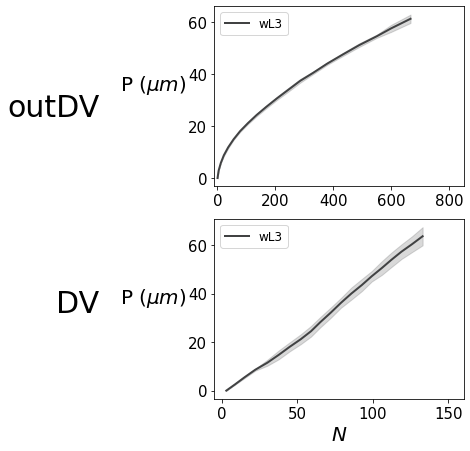

In [11]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']

#devstages = ['upcrawling']

nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (5.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = ''
        if (j == 0) or (nbcols == 1):
            ylabel ='P ' + r'$(\mu m)$'
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$N$'
        if roi == 'DV':
            #xticks = [0, 50, 100, 150]
            #yticks = [0, 10, 20]
            #xlim = (-1, 25)
            xlim = (-5,160)
            #ylim = (-2, 27)
        else:
            #xticks = [0, 250, 500, 750]
            #yticks = [0, 10, 20]
            xlim = (-10,850)
            #xlim = (-1, 25)
            #ylim = (-2, 27)
        
        ax = get_subplot(ax, df = None, #df_pool_k, 
                         stat_df = df_pool_devstage, df_cases_col='discName',
                         query_str = query_str, x_col = 'cumcount', y_col = 'k_dist_pathlength', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =2,
                         mean_label=devstage, ylabelpad = 35,
                        )
        
    ax.grid()
    ax.legend(fontsize = 12)
    
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 90, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1,)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/k_vs_N.pdf', bbox_inches = 'tight')


[]

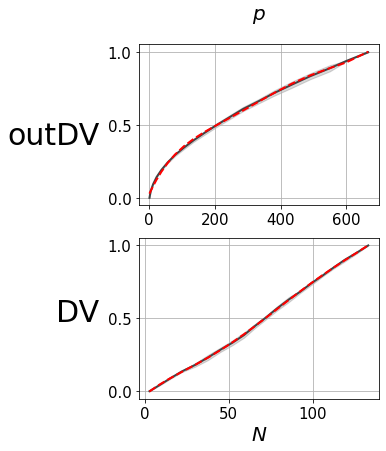

In [12]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']
#devstages = ["wL3"]
devstages = ["wL3",]

nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (4.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = r'$p$'
        if (j == 0) or (nbcols == 1):
            ylabel =''
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$N$'
        if roi == 'DV':
            #xticks = [0, 50, 100, 150]
            yticks = [0, 0.5, 1]
            #xlim = (-1, 22)
            #xlim = (-5,155)
            #ylim = (-2, 27)
        else:
            #xticks = [0, 250, 500, 750]
            yticks = [0, 0.5, 1]
            #xlim = (-10,780)
            #xlim = (-1, 22)
            #ylim = (-2, 27)
        
        ax = get_subplot(ax, df = None, #df_pool_k, 
                         stat_df = df_pool_devstage, df_cases_col='discName',
                         query_str = query_str, x_col = 'cumcount', y_col = 'pathlength_scaled', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =2,
                         mean_label=devstage, ylabelpad = 0,
                        )
        
        #fit line
        df_roi_stage = df_pool_devstage.query(query_str)
        ax.plot(df_roi_stage['cumcount_mean'], df_roi_stage['ref_pathlength_scaled'], linestyle = '--', color = "red", linewidth = 2, label = 'fit')
        
    ax.grid(visible=True)
    #ax.legend(fontsize = 20)
    
fig.tight_layout()



plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 15, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/k_vs_N.pdf', bbox_inches = 'tight')



In [13]:

devstage = 'wL3'
roi = 'outDV'
query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
df_roi_stage = df_pool_devstage.query(query_str)
max_pathlength_outDV = max(df_roi_stage['k_dist_pathlength_mean'])

roi = 'DV'
query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
df_roi_stage = df_pool_devstage.query(query_str)
max_pathlength_DV = max(df_roi_stage['k_dist_pathlength_mean'])

max_pathlength = (max_pathlength_outDV + max_pathlength_DV)/2


print('Max pathlength at upcrawling stage')
print(max_pathlength)

Max pathlength at upcrawling stage
62.43848353440034


## Area analysis

[]

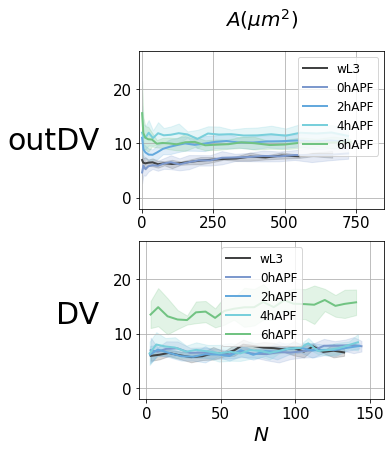

In [14]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']
devstages = ["wL3","0hAPF","2hAPF","4hAPF","6hAPF",]

nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (4.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = r'$A(\mu m^2)$' 
        if (j == 0) or (nbcols == 1):
            ylabel =''
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$N$'
        if roi == 'DV':
            xticks = [0, 50, 100, 150]
            yticks = [0, 10, 20]
            xlim = (-5,160)
            ylim = (-2, 27)
        else:
            xticks = [0, 250, 500, 750,]
            yticks = [0, 10, 20]
            xlim = (-10,850)
            ylim = (-2, 27)
        
        ax = get_subplot(ax, df = None,  #df_pool_k, 
                         stat_df = df_pool_devstage, df_cases_col='discName',
                         query_str = query_str, x_col = 'cumcount', y_col = 'area', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =2,
                         mean_label=devstage, ylabelpad = 0,
                        )
        
    ax.grid(visible=True)
    ax.legend(fontsize = 12)
    
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 15, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/k_vs_N.pdf', bbox_inches = 'tight')


In [15]:
devstage_combinations = pd.DataFrame({'devstage_init':[#'96hAEL',
                                                       'wL3',
                                                       '4hAPF',
                                                       #'wL3','0hAPF','2hAPF', '4hAPF'
                                                      ],
                                     'devstage_final':[#'upcrawling',
                                                       '4hAPF',
                                                       '6hAPF',
                                                       #'0hAPF','2hAPF','4hAPF', '6hAPF'
                                                      ],}
                                    )

prop = 'area'


[area_diff, area_diff_stat] = get_prop_differences(df_pool_k, prop = prop,operation = 'divide-sqrt',
                                                   devstage_combinations=devstage_combinations)



[]

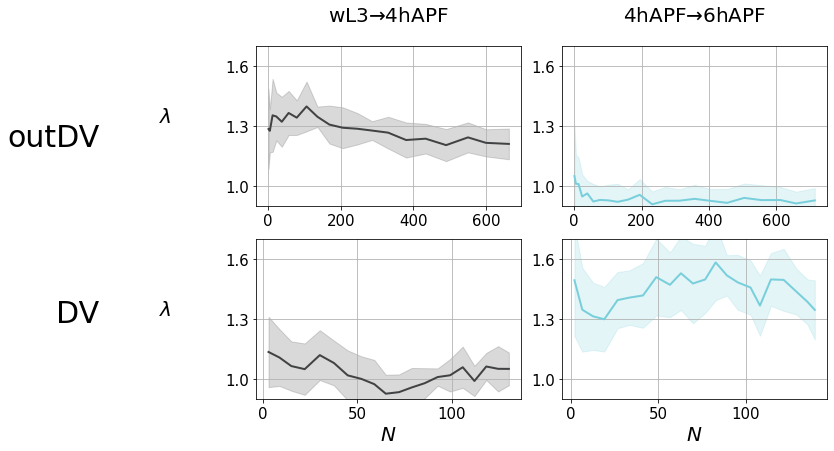

In [16]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = len(devstage_combinations)
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(nbcols):
        
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = devstage_init + r'$ \to $' + devstage_final
        if j == 0:
            #ylabel = r'$\sqrt{A(T_2)/A(T_1)}$'
            ylabel = r'$\lambda$'
        if i == nbrows-1:
            xlabel = r'$N$'
        if roi == 'DV':
            #xticks = [0, 50, 100, 150]
            yticks = [1, 1.3, 1.6] 
            #xlim = (0,155)
            ylim = (0.9, 1.7) 
        else:
            #xticks = [0, 250, 500, 750]
            yticks = [1,1.3, 1.6]
            #xlim = (0,780)
            ylim = (0.9, 1.7)
        
        x_col = 'N_beta'
        y_col = prop+'_diff'
        ax = get_subplot(ax, df = None, #area_diff, 
                         stat_df = area_diff_stat, query_str = query_str, x_col = x_col, y_col = y_col, 
                         mean_color = color_dict[devstage_init], mean_linewidth= 2, mean_alpha = 0.2, #properties of the mean line
                         xlabel = xlabel, ylabel = ylabel, title = title, ylabelpad=60,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                        )
        
        #ax = get_subplot(ax, df = None, stat_df = area_diff_stat, query_str = query_str, 
        #                 x_col_mean='k_beta', y_col_mean ='fit_'+prop+'_diff',
        #                 xlabel = xlabel, ylabel = ylabel, title = title, ylabelpad=60,
        #                 xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
        #                 mean_linewidth=2,mean_color = color_dict[devstage_init], mean_linestyle='--',
        #                 error_style = None,
        #                )
        
        #ax.plot(area_diff_stat['N_beta_mean'], area_diff_stat['area_diff_mean'], linewidth = 2, linestyle = '--')
        
        ax.grid(visible = True)
        
        
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 90, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, 
                    pad = 100, # if two columns
                    #pad = 30, #if four columns
                    rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/DDk_Dt_twoPanels.pdf', bbox_inches = 'tight')


In [17]:


devstage_combinations = pd.DataFrame({'devstage_init':[#'96hAEL',
                                                       'wL3',
                                                       '4hAPF',
                                                       #'wL3','0hAPF','2hAPF', '4hAPF'
                                                      ],
                                     'devstage_final':[#'upcrawling',
                                                       '4hAPF',
                                                       '6hAPF',
                                                       #'0hAPF','2hAPF','4hAPF', '6hAPF'
                                                      ],}
                                    )

prop = 'area'


[area_diff, area_diff_stat] = get_prop_differences(df_pool_k, prop = prop,operation = 'divide-sqrt',
                                                   devstage_combinations=devstage_combinations, 
                                                   fit_param = 'ref_pathlength_scaled_beta_mean'
                                                  )



[]

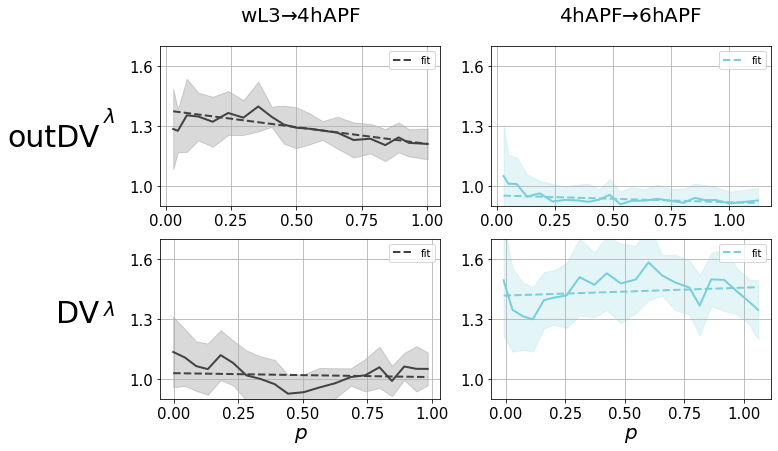

In [18]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = len(devstage_combinations)
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(nbcols):
        
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = devstage_init + r'$ \to $' + devstage_final
        if j == 0:
            ylabel = r'$\lambda$'
        if i == nbrows-1:
            xlabel = r'$p$'
        if roi == 'DV':
            xticks = [0, 0.25, 0.5, 0.75, 1]
            yticks = [1, 1.3, 1.6] 
            #xlim = (0,155)
            ylim = (0.9, 1.7) 
        else:
            xticks = [0, 0.25, 0.5, 0.75, 1]
            yticks = [1,1.3, 1.6]
            #xlim = (0,780)
            ylim = (0.9, 1.7)
        
        ax = get_subplot(ax, df = None, #area_diff, 
                         stat_df = area_diff_stat, query_str = query_str, x_col = 'ref_pathlength_scaled_beta', y_col = prop+'_diff', 
                         mean_color = color_dict[devstage_init], mean_linewidth= 2, mean_alpha = 0.2, #properties of the mean line
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         error_style='fill_between'
                        )

        ax = get_subplot(ax, df = None, stat_df = area_diff_stat, query_str = query_str, 
                         x_col_mean='ref_pathlength_scaled_beta_mean', y_col_mean ='fit_'+prop+'_diff',
                         xlabel = xlabel, ylabel = ylabel, title = title, ylabelpad=20,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         mean_linewidth=2,mean_color = color_dict[devstage_init], mean_linestyle='--',
                         error_style = None, mean_label = 'fit',
                        )
        
        ax.legend()
        ax.grid(visible=True)
        
        
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, 
                    pad = 0, # if two columns
                    #pad = 30, #if four columns
                    rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/DDk_Dt_twoPanels.pdf', bbox_inches = 'tight')


In [19]:
#Printing the fit lines

for i in range(len(rois)):
    roi = rois[i]
    
    for j in range(len(devstage_combinations)):
    
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        df_roi_devstage = area_diff_stat.query(query_str).reset_index(drop = True)
        coeffs = df_roi_devstage.loc[0,'fit_'+ prop + '_coeffs']
        #coeffs = coeffs_orig
        #coeffs[0] = coeffs[0]/k_scaled_dist_dict[roi]
        
        print(roi + ' : ' + devstage_init + ' to ' + devstage_final)
        #print('x = scaled in-surface distance')
        #to convert from k to scaled dist, we divide by the slope m where P_scaled = m.k_dist
        #assuming straight line
        print(np.poly1d(coeffs))
        #assuming straight line
        print('\n')
        
        

outDV : wL3 to 4hAPF
 
-0.1682 x + 1.38


outDV : 4hAPF to 6hAPF
 
-0.0338 x + 0.9539


DV : wL3 to 4hAPF
 
-0.01954 x + 1.028


DV : 4hAPF to 6hAPF
 
0.03956 x + 1.417




## Elongation analysis

[]

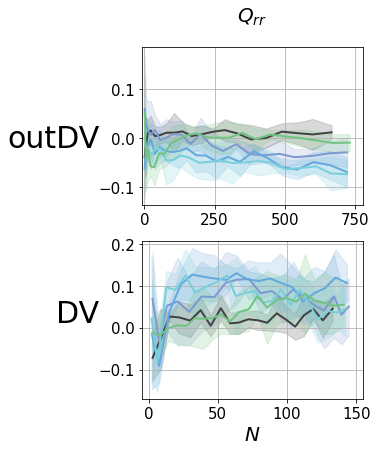

In [20]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (4.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = r'$Q_{rr}$'
        if (j == 0) or (nbcols == 1):
            ylabel = ''
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$N$'
        if roi == 'DV':
            xticks = [0, 50, 100, 150]
            #yticks = [0, 10, 20]
            xlim = (-5,155)
            #ylim = (-2, 27)
        else:
            xticks = [0, 250, 500, 750]
            #yticks = [0, 10, 20]
            xlim = (-10,780)
            #ylim = (-2, 27)
        
        ax = get_subplot(ax, df = None, #df_pool_k, 
                         stat_df = df_pool_devstage, df_cases_col='discName',
                         query_str = query_str, x_col = 'cumcount', y_col = 'Qrr_geom_inPlane', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =2,
                         mean_label=devstage, ylabelpad = 0,
                        )
        
    ax.grid(visible = True)
    #ax.legend(fontsize = 12)
    
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 100, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 20, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/k_vs_N.pdf', bbox_inches = 'tight')


[]

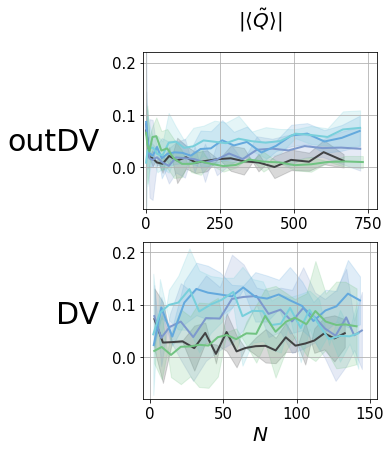

In [21]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (4.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = r'$|\langle  \tilde{Q} \rangle |$'
        if (j == 0) or (nbcols == 1):
            ylabel =''
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$N$'
        if roi == 'DV':
            xticks = [0, 50, 100, 150]
            #yticks = [0, 10, 20]
            xlim = (-5,155)
            ylim = (-0.08, 0.22)
        else:
            xticks = [0, 250, 500, 750]
            #yticks = [0, 10, 20]
            xlim = (-10,780)
            ylim = (-0.08, 0.22)
        
        ax = get_subplot(ax, df = None, #df_pool_k, 
                         stat_df = df_pool_devstage, df_cases_col='discName',
                         query_str = query_str, x_col = 'cumcount', y_col = 'Qnorm', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =2,
                         mean_label=devstage, ylabelpad = 0,
                        )
        
    ax.grid(visible = True)
    #ax.legend(fontsize = 12)
    
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 20, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/k_vs_N.pdf', bbox_inches = 'tight')


[]

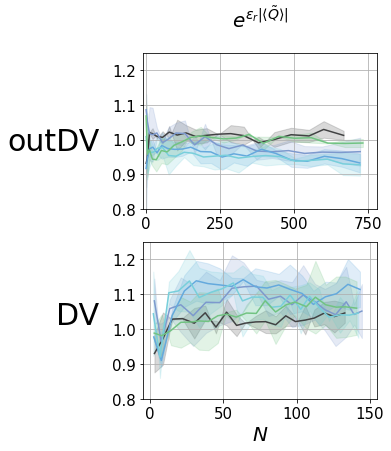

In [22]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (4.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = r'$e^{\epsilon_r|\langle  \tilde{Q} \rangle | }$'
        if (j == 0) or (nbcols == 1):
            ylabel = ''
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$N$'
        if roi == 'DV':
            xticks = [0, 50, 100, 150]
            #yticks = [0, 10, 20]
            xlim = (-5,155)
            ylim = (0.8, 1.25)
        else:
            xticks = [0, 250, 500, 750]
            #yticks = [0, 10, 20]
            xlim = (-10,780)
            ylim = (0.8, 1.25)
        
        ax = get_subplot(ax, df = None, #df_pool_k, 
                         stat_df = df_pool_devstage, df_cases_col='discName',
                         query_str = query_str, x_col = 'cumcount', y_col = 'exp_signed_Qnorm', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =1.5,
                         mean_label=devstage, ylabelpad = 0,
                        )
        
    ax.grid(visible = True)
    #ax.legend(fontsize = 12)
    
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 20, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/k_vs_N.pdf', bbox_inches = 'tight')


In [23]:
devstage_combinations = pd.DataFrame({'devstage_init':[#'96hAEL',
                                                       'wL3',
                                                       '4hAPF',
                                                       #'wL3','0hAPF','2hAPF', '4hAPF'
                                                      ],
                                     'devstage_final':[#'upcrawling',
                                                       '4hAPF',
                                                       '6hAPF',
                                                       #'0hAPF','2hAPF','4hAPF', '6hAPF'
                                                      ],}
                                    )

prop = 'exp_signed_Qnorm'


[el_diff, el_diff_stat] = get_prop_differences(df_pool_k, prop = prop,operation = 'divide',
                                                   devstage_combinations=devstage_combinations,
                                                   fit_param='ref_pathlength_scaled_beta_mean',
                                              )


[]

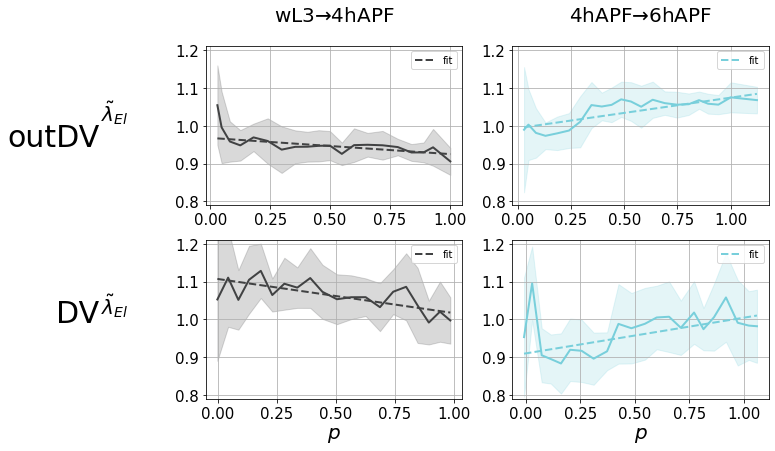

In [24]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = len(devstage_combinations)
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(nbcols):
        
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = devstage_init + r'$ \to $' + devstage_final
        if j == 0:
            ylabel = r'$\tilde{\lambda}_{El}$'
        if i == nbrows-1:
            xlabel = r'$p$'
        if roi == 'DV':
            xticks = [0, 0.25, 0.5, 0.75, 1]
            yticks = [0.8,0.9,1,1.1, 1.2 ] 
            #xlim = (0,155)
            ylim = (0.79, 1.21) 
        else:
            xticks = [0, 0.25, 0.5, 0.75, 1]
            yticks = [0.8, 0.9, 1, 1.1, 1.2]
            #xlim = (0,780)
            ylim = (0.79, 1.21)
        
        ax = get_subplot(ax, df = None, #el_diff, 
                         stat_df = el_diff_stat, query_str = query_str, x_col = 'ref_pathlength_scaled_beta', y_col = prop+'_diff', 
                         mean_color = color_dict[devstage_init], mean_linewidth= 2, mean_alpha = 0.2, #properties of the mean line
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         error_style='fill_between'
                        )

        ax = get_subplot(ax, df = None, stat_df = el_diff_stat, query_str = query_str, 
                         x_col_mean='ref_pathlength_scaled_beta_mean', y_col_mean ='fit_'+prop+'_diff',
                         xlabel = xlabel, ylabel = ylabel, title = title, ylabelpad=60,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         mean_linewidth=2,mean_color = color_dict[devstage_init], mean_linestyle='--',
                         error_style = None, mean_label = 'fit'
                        )
        
        ax.legend()
        ax.grid()
        
        
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, 
                    pad = 50, # if two columns
                    #pad = 30, #if four columns
                    rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/DDk_Dt_twoPanels.pdf', bbox_inches = 'tight')


In [25]:
#Printing the fit lines

for i in range(len(rois)):
    roi = rois[i]
    
    for j in range(len(devstage_combinations)):
    
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        df_roi_devstage = el_diff_stat.query(query_str).reset_index(drop = True)
        coeffs = df_roi_devstage.loc[0,'fit_'+ prop + '_coeffs']
        #coeffs = coeffs_orig
        #coeffs[0] = coeffs[0]/k_scaled_dist_dict[roi]
        
        print(roi + ' : ' + devstage_init + ' to ' + devstage_final)
        #to convert from k to scaled dist, we divide by the slope m where P_scaled = m.k_dist
        #assuming straight line
        print(np.poly1d(coeffs))
        #assuming straight line
        print('\n')


outDV : wL3 to 4hAPF
 
-0.04274 x + 0.9679


outDV : 4hAPF to 6hAPF
 
0.08075 x + 0.9937


DV : wL3 to 4hAPF
 
-0.09028 x + 1.107


DV : 4hAPF to 6hAPF
 
0.09436 x + 0.9102




## Rearrangement analysis

In [26]:
df = pd.read_pickle('data/DFallDiscsIncreaselimitcounts.pkl')
#df = df[df['genotype'] == 'ecadGFPnbG4']
#df = df[df['genotype'] == 'ecadGFPnbG4myoVI']
#genotype = 'ecadGFPnbG4myoVI'
df = df[df['genotype'] == genotype]

devstages = ["96hAEL","wL3","0hAPF","2hAPF","4hAPF","6hAPF",]
rois = ['outDV', 'DV']
df["devstage"] = [devstage_map[x] for x in df["devstage"].values]

#ref_pathlength_scaled_beta
#devstages = ['96hAEL', 'upcrawling','whitePupa','2hAPF','4hAPF','6hAPF']

[k_N_alldiscs, k_N_mean] = analyze_ring_cell_numbers(df, devstages = devstages)

devstage_combinations = pd.DataFrame({'devstage_init':[#'96hAEL',
                                                       'wL3',
                                                       '4hAPF',
                                                       #"wL3","0hAPF","2hAPF","4hAPF"
                                                      ],
                                     'devstage_final':[#'upcrawling',
                                                       '4hAPF',
                                                       '6hAPF',
                                                       #"0hAPF","2hAPF","4hAPF","6hAPF"
                                                      ],}
                                    )

[k_diff, k_diff_stat] = get_k_differences(k_N_alldiscs, devstage_combinations = devstage_combinations, rois = rois, fit_param = 'ref_pathlength_scaled_beta_mean', N_ref_pathlength_dict = k_scaled_dist_dict)

#k_diff["ref_pathlength_scaled_beta"] = k_diff.apply(lambda row: k_scaled_dist_dict[row['roi']](row["N_beta"]),axis = 1)
#k_diff_stat["ref_pathlength_scaled_beta"] = k_diff_stat.apply(lambda row: k_scaled_dist_dict[row['roi']](row['N_beta_mean']),axis = 1)


[]

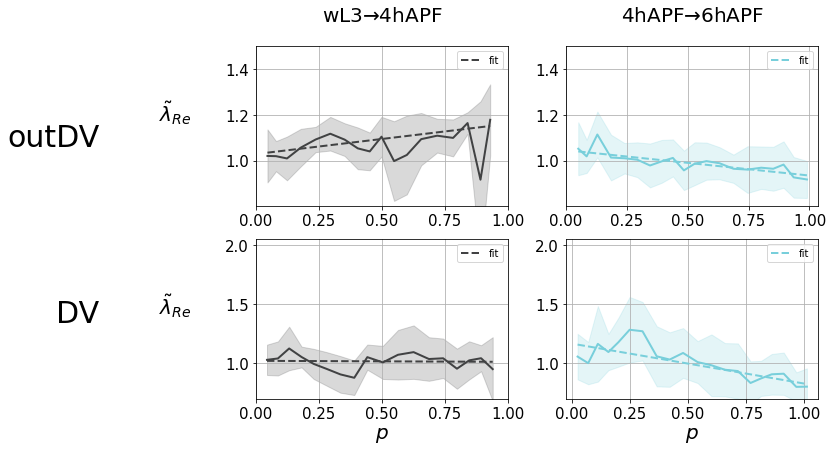

In [27]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = len(devstage_combinations)
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(nbcols):
        
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = devstage_init + r'$ \to $' + devstage_final
        if j == 0:
            ylabel = r'$\tilde{\lambda}_{Re}$'
        if i == nbrows-1:
            xlabel = r'$p$'
        if roi == 'DV':
            xticks = [0, 0.25, 0.5, 0.75, 1]
            yticks = [1, 1.5, 2.0] 
            #xlim = (0,155)
            ylim = (0.7, 2.05) 
        else:
            xticks = [0, 0.25, 0.5, 0.75, 1]
            yticks = [1, 1.2, 1.4,]
            #xlim = (0,780)
            ylim = (0.8, 1.5)
        
        ax = get_subplot(ax, df = None,#k_diff, 
                         stat_df=k_diff_stat, query_str = query_str, x_col = 'ref_pathlength_scaled_beta_mean', y_col = 'lambda_rearrangement', 
                         mean_color=color_dict[devstage_init], mean_linewidth=2,
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                        )
        ax = get_subplot(ax, df = None, 
                         stat_df = k_diff_stat, query_str = query_str, 
                         x_col_mean='ref_pathlength_scaled_beta_mean', y_col_mean ='fit_lambda_rearrangement',
                         mean_color=color_dict[devstage_init], mean_linewidth=2,
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         mean_linestyle='--',error_style = None, mean_label = 'fit'
                        )
        ax.legend()
        ax.grid()
        
        
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, 
                    pad = 100, # if two columns
                    #pad = 30, #if four columns
                    rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/lambda_rearrangement_twoPanels.pdf', bbox_inches = 'tight')

In [28]:
#Printing the fit lines

for i in range(len(rois)):
    roi = rois[i]
    
    for j in range(len(devstage_combinations)):
    
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        df_roi_devstage = k_diff_stat.query(query_str).reset_index(drop = True)
        coeffs = df_roi_devstage.loc[0,'fit_lambda_rearrangement_coeffs']
        #coeffs = coeffs_orig
        #coeffs[0] = coeffs[0]/k_scaled_dist_dict[roi]
        
        print(roi + ' : ' + devstage_init + ' to ' + devstage_final)
        #print('x = scaled in-surface distance')
        #to convert from k to scaled dist, we divide by the slope m where P_scaled = m.k_dist
        #assuming straight line
        print(np.poly1d(coeffs))
        #assuming straight line
        print('\n')
        
        

outDV : wL3 to 4hAPF
 
0.1321 x + 1.028


outDV : 4hAPF to 6hAPF
 
-0.1112 x + 1.045


DV : wL3 to 4hAPF
 
-0.008727 x + 1.021


DV : 4hAPF to 6hAPF
 
-0.3384 x + 1.167




## Getting anisotropic lambda as product of elongation and rearrangement

In [29]:
#Printing the fit lines

k_diff_stat['fit_tot_anisotropic'] = None
el_diff_stat['fit_tot_anisotropic'] = None

for i in range(len(rois)):
    roi = rois[i]
    
    for j in range(len(devstage_combinations)):
    
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        rearrangement_temp_df = k_diff_stat.query(query_str)
        df_roi_devstage = rearrangement_temp_df.reset_index(drop = True)
        coeffs_rearrangement = df_roi_devstage.loc[0,'fit_lambda_rearrangement_coeffs']
        #coeffs_rearrangement_scaled = [coeffs_rearrangement[0]/k_scaled_dist_dict[roi], coeffs_rearrangement[1]]
        
        elongation_temp_df = el_diff_stat.query(query_str)
        df_roi_devstage = elongation_temp_df.reset_index(drop = True)
        coeffs_elongation = df_roi_devstage.loc[0,'fit_exp_signed_Qnorm_coeffs']
        #coeffs_elongation_scaled = [coeffs_elongation[0]/k_scaled_dist_dict[roi], coeffs_elongation[1]]
        #coeffs = coeffs_orig
        #coeffs[0] = coeffs[0]/k_scaled_dist_dict[roi]
        
        coeffs_anisotropic = np.polymul(coeffs_rearrangement, coeffs_elongation)
        #coeffs_anisotropic_scaled = np.polymul(coeffs_rearrangement_scaled, coeffs_elongation_scaled)
        
        poly_obj = np.poly1d(coeffs_anisotropic)
        #poly_obj_scaled = np.poly1d(coeffs_anisotropic_scaled)
        print(roi + ' : ' + devstage_init + ' to ' + devstage_final)
        #print('x = scaled in-surface distance')
        #to convert from k to scaled dist, we divide by the slope m where P_scaled = m.k_dist
        #assuming straight line
        print(np.poly1d(coeffs_anisotropic))
        #assuming straight line
        print('\n')
        
        k_diff_stat.loc[rearrangement_temp_df.index,'fit_tot_anisotropic'] = poly_obj(k_diff_stat.loc[rearrangement_temp_df.index,'ref_pathlength_scaled_beta_mean'].values)
        el_diff_stat.loc[elongation_temp_df.index,'fit_tot_anisotropic'] = poly_obj(el_diff_stat.loc[elongation_temp_df.index,'ref_pathlength_scaled_beta_mean'].values)

#k_diff_stat['fit_tot_anisotropic'] = np.poly1d(coeffs_anisotropic_scaled)(k_diff_stat['k_beta'])
#el_diff_stat['fit_tot_anisotropic'] = np.poly1d(coeffs_anisotropic_scaled)(el_diff_stat['k_beta'])

outDV : wL3 to 4hAPF
           2
-0.005645 x + 0.08389 x + 0.9954


outDV : 4hAPF to 6hAPF
           2
-0.008979 x - 0.02607 x + 1.039


DV : wL3 to 4hAPF
           2
0.0007879 x - 0.1018 x + 1.13


DV : 4hAPF to 6hAPF
          2
-0.03193 x - 0.1979 x + 1.062




[]

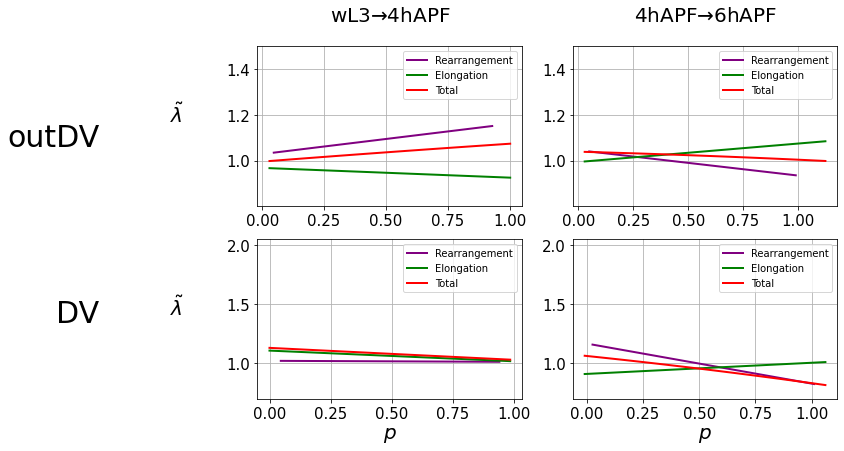

In [30]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = len(devstage_combinations)
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(nbcols):
        
        devstage_init = devstage_combinations.loc[j,'devstage_init']
        devstage_final = devstage_combinations.loc[j,'devstage_final']
        
        query_str = '(devstage_init == "' + devstage_init + '") & (devstage_final == "' + devstage_final + '") & (roi == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = devstage_init + r'$ \to $' + devstage_final
        if j == 0:
            ylabel = r'$\tilde{\lambda}$'
        if i == nbrows-1:
            xlabel = r'$p$'
        if roi == 'DV':
            xticks = [0, 0.25, 0.5, 0.75, 1]
            yticks = [1, 1.5, 2.0] 
            #xlim = (0,155)
            ylim = (0.7, 2.05) 
        else:
            xticks = [0, 0.25, 0.5, 0.75, 1]
            yticks = [1, 1.2, 1.4,]
            #xlim = (0,780)
            ylim = (0.8, 1.5)
        
        #ax = get_subplot(ax, df = None,#k_diff, 
        #                 stat_df=k_diff_stat, query_str = query_str, x_col = 'k_beta', y_col = 'lambda_rearrangement', 
        #                 mean_color=color_dict[devstage_init], mean_linewidth=2,
        #                 xlabel = xlabel, ylabel = ylabel, title = title,
        #                 xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
        #                )
        ax = get_subplot(ax, df = None, 
                         stat_df = k_diff_stat, query_str = query_str, 
                         x_col_mean='ref_pathlength_scaled_beta_mean', y_col_mean ='fit_lambda_rearrangement',
                         mean_color='purple', 
                         mean_linewidth=2, mean_label='Rearrangement',
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         mean_linestyle='-',error_style = None,
                        )
        
        
        ax = get_subplot(ax, df = None, 
                         stat_df = el_diff_stat, query_str = query_str, 
                         x_col_mean='ref_pathlength_scaled_beta_mean', y_col_mean ='fit_exp_signed_Qnorm_diff',
                         mean_color='green', 
                         mean_linewidth=2, mean_label='Elongation',
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         mean_linestyle='-',error_style = None,
                        )
        
        ax = get_subplot(ax, df = None, 
                         stat_df = el_diff_stat, query_str = query_str, 
                         x_col_mean='ref_pathlength_scaled_beta_mean', y_col_mean ='fit_tot_anisotropic',
                         mean_color='red', 
                         mean_linewidth=2, mean_label='Total',
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         mean_linestyle='-',error_style = None,
                        )
        
        
        ax.legend()
        ax.grid(visible=True)
        
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, 
                    pad = 100, # if two columns
                    #pad = 30, #if four columns
                    rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/lambda_rearrangement_twoPanels.pdf', bbox_inches = 'tight')

### Height analysis

In [33]:
df_Height = pd.read_pickle("data/ecadGFPnbG4HeightVolumneTrunkated-acrossDV.pkl")


devstage_map = {
                "96hAEL":"96hAEL",
                "120hAEL":"120hAEL",
                "upcrawling":"wL3",
                "whitePupa":"0hAPF",
                "2hAPF":"2hAPF",
                "4hAPF":"4hAPF",
                "6hAPF":"6hAPF",
               }

In [35]:
np.unique(df_Height.devstage)

array(['120hAEL', '2hAPF', '4hAPF', '6hAPF', '96hAEL', 'upcrawling',
       'whitePupa'], dtype=object)

In [32]:
df_height = pickle.load("data/ecadGFPnbG4HeightVolumneTrunkated-acrossDV.pkl", encoding= 'unicode_escape')

TypeError: file must have 'read' and 'readline' attributes

### Archive - things below under construction

In [259]:
a = [1,2,3]
a[-1]

3

In [25]:
prop = 'exp_signed_Qnorm'
poly_obj = area_diff_stat['fit_' + prop + '_obj'][0]
print(poly_obj)     

 
-0.001404 x + 0.9791


In [26]:
poly_obj.coefficients

array([-0.00140415,  0.97909342])

In [5]:
def piecewise_linear_interpolate(xs_interpolated, xs, ys, manner = 'linear', include_zero = False):
    
    #assuming that xs are sorted
    #we want to know first the index i of xs for which xs[i + 1] >= x > xs[i]
    
    if include_zero:
        xs = np.array(xs)
        ys = np.array(ys)
        xs = xs.insert(xs, 0, 0) #0 included at beginning
        ys = ys.insert(ys, 0, 0) #0 included at beginning
    
    indexes = np.searchsorted(a = xs, v = xs_interpolated, side = 'right')  #function tells you the index where the element v should go to maintain the order of a. ##side does not matter if y(x) is continuous 
    ys_interpolated = []
    
    if indexes.shape == 1:
        indexes = [indexes]
        
    for ctr in range(len(indexes)):
        
        i = indexes[ctr]
        x_interpolated = xs_interpolated[ctr]
        i = i-1
        
        if (i >= len(xs) - 1) or (i < 0):
            #special boundary cases
            if x_interpolated == xs[0]:
                y_interpolated = ys[0]
                ys_interpolated.append(y_interpolated)
                continue
            elif x_interpolated == xs[len(xs)-1]:
                y_interpolated = ys[len(xs)-1]
                ys_interpolated.append(y_interpolated)
                continue 
            else:
                #print('cannot interpolate outside the domain of x values')
                #print(x_interpolated)
                y_interpolated = None
                ys_interpolated.append(y_interpolated)
                continue
            
        if manner == 'linear':
            slope = (ys[i + 1] - ys[i])/(xs[i + 1] - xs[i])
        elif manner == 'step':
            slope = 0
            
        y_interpolated = ys[i] + (x_interpolated - xs[i])*slope
        ys_interpolated.append(y_interpolated)
        
    if len(ys_interpolated) == 1:
        return(ys_interpolated[0])

    return(np.array(ys_interpolated))


In [6]:
def piecewise_step_interpolate(xs_interpolated, xs, ys,):
    
    #assuming that xs are sorted
    #we want to know first the index i of xs for which xs[i + 1] >= x > xs[i]
    
    indexes = np.searchsorted(a = xs, v = xs_interpolated, side = 'right')  #function tells you the index where the element v should go to maintain the order of a. ##side does not matter if y(x) is continuous 
    ys_interpolated = []
    
    if indexes.shape == 1:
        indexes = [indexes]
        
    for ctr in range(len(indexes)):
        
        i = indexes[ctr]
        x_interpolated = xs_interpolated[ctr]
        #i = i-1
        
        if (i >= len(xs) - 1) or (i < 0):
            #special boundary cases
            if x_interpolated == xs[0]:
                y_interpolated = ys[0]
                ys_interpolated.append(y_interpolated)
                continue
            elif x_interpolated == xs[len(xs)-1]:
                y_interpolated = ys[len(xs)-1]
                ys_interpolated.append(y_interpolated)
                continue 
            else:
                #print('cannot interpolate outside the domain of x values')
                #print(x_interpolated)
                y_interpolated = None
                ys_interpolated.append(y_interpolated)
                continue
            
        y_interpolated = ys[i] #+ (x_interpolated - xs[i])*slope
        ys_interpolated.append(y_interpolated)
        
    if len(ys_interpolated) == 1:
        return(ys_interpolated[0])

    return(np.array(ys_interpolated))


In [7]:
def analyze_ring_cell_numbers_per_roi(df, roi = 'outDV', devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']):
    
    df_k_N_alldiscs = pd.DataFrame(columns = ['devstage', 'disc', 'k_dist', 'N_cum'], dtype=float)

    df_k_N_mean = pd.DataFrame(columns=['devstage', 'k_dist', 'N_cum_mean', 'N_cum_std'])

    for devstage in devstages:

        df_devstage = df[df['devstage'] == devstage]
        discs = np.unique(df_devstage['discName'])
        #print(devstage + ' roi')
        #print(np.unique(df_devstage['roi']))
        #print('number of discs ' + str(len(discs)))

        for disc in discs:

            df_disc_devstage = df[(df['devstage'] == devstage) & (df['discName'] == disc)]

            #setting an offset in k_dists
            df_disc_devstage.loc[:,'k_dist'] = df_disc_devstage['k_dist'].values - min(df_disc_devstage['k_dist'])

            k_dists = np.sort(np.unique(df_disc_devstage['k_dist']))

            N = 0

            for k_dist in k_dists:

                if roi == 'outDV':
                    if len(df_disc_devstage.loc[(df_disc_devstage['roi'] == 'ventral') | (df_disc_devstage['roi'] == 'dorsal')]) == 0:
                        #print('no dorsal or ventral')
                        #print(k_dist)
                        break

                    cumcounts = np.unique(df_disc_devstage.loc[(df_disc_devstage['k_dist'] == k_dist) & ((df_disc_devstage['roi'] == 'ventral') | (df_disc_devstage['roi'] == 'dorsal')),'cumcount'])


                if roi == 'DV':
                    if len(df_disc_devstage.loc[(df_disc_devstage['roi'] == 'DV')]) == 0:
                        #print('no DV boundary')
                        #print(k_dist)
                        break

                    cumcounts = np.unique(df_disc_devstage.loc[(df_disc_devstage['k_dist'] == k_dist) & ((df_disc_devstage['roi'] == 'DV')),'cumcount'])

                cumcount= np.mean(cumcounts)

                row = pd.DataFrame([[devstage, disc, k_dist, cumcount]],
                                   columns = df_k_N_alldiscs.columns
                                  )
                df_k_N_alldiscs=pd.concat([df_k_N_alldiscs,row])

    df_k_N_alldiscs = df_k_N_alldiscs.reset_index(drop=True)
    df_k_N_alldiscs['roi'] = roi
    
    df_k_N_mean = df_k_N_alldiscs.groupby(['devstage', 'k_dist']).mean()
    df_k_N_mean.columns = ['N_cum_mean']
    df_k_N_std = df_k_N_alldiscs.groupby(['devstage', 'k_dist']).std()
    df_k_N_std.columns = ['N_cum_std']
    df_k_N_mean = pd.concat([df_k_N_mean,df_k_N_std ], axis = 1)
    df_k_N_mean = df_k_N_mean.reset_index()
    df_k_N_mean['roi'] = roi
    
    return([df_k_N_alldiscs, df_k_N_mean])

def analyze_ring_cell_numbers(df, devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']):
    
    [outDV_k_N_alldiscs, outDV_k_N_mean] = analyze_ring_cell_numbers_per_roi(df, roi = 'outDV', devstages = devstages)
    [DV_k_N_alldiscs, DV_k_N_mean] = analyze_ring_cell_numbers_per_roi(df, roi = 'DV', devstages = devstages)
    
    k_N_alldiscs = pd.concat([outDV_k_N_alldiscs, DV_k_N_alldiscs]).reset_index(drop=True)
    k_N_mean = pd.concat([outDV_k_N_mean, DV_k_N_mean]).reset_index(drop=True)
    
    return([k_N_alldiscs, k_N_mean])

In [5]:
def get_subplot(ax, df = None, stat_df = None, query_str = '', df_cases_col = 'disc_combination',
                x_col = 'N_beta', y_col = 'k_diff', 
                x_col_mean = None, y_col_mean = None, x_col_std = None, y_col_std = None, 
                xlabel = 'N (cumulative)', ylabel = r'$\Delta_{N}\Delta_{T}k$', title = 'Stage1 to Stage2',
                individual_color = 'gray', mean_color = 'red', individual_linewidth = 1, mean_linewidth = 1.5,
                ylabelpad = 50, mean_label = '',
                xticks = None, yticks = None, xlim = None, ylim = None,
               ):
    
    #df contains data for every individual plot
    #df_cases_col is the column name used to filter data for single curves
    #x_col, y_col are the columns to be plotted in df
    #individual_color is the color of the line for individual plots
    
    #stat_df contains mean, std for each category
    #x_col_mean, y_col_mean, x_col_std, y_col_std are the names of the columns in stat_df
    #mean_color is the color of the line for mean plots
    
    #query_str is used to filter the data
    
    if df is not None:
        
        f_alpha_beta_df = df.query(query_str) #[(k_diff['devstage_init'] == devstage_init) & (k_diff['devstage_final'] == devstage_final) & (k_diff['roi'] == roi)]


        disc_combinations = np.unique(f_alpha_beta_df[df_cases_col].values)
        #fig, ax = plt.subplots()

        for disc_combination in disc_combinations:
            df = f_alpha_beta_df[f_alpha_beta_df[df_cases_col] == disc_combination]
            #ax.scatter(df['N_beta'], df['DDk/DNDt'])
            ax.plot(df[x_col], df[y_col], color = individual_color, lw = individual_linewidth, alpha = 0.2)
        
    if stat_df is not None:
        stat_df = stat_df.query(query_str)

        if x_col_mean is None:
            #first we try to add mean in front of the name
            x_col_mean = x_col + '_mean'
            if x_col_mean not in stat_df.columns:
                #next we try the name without any addition
                x_col_mean = x_col
        if y_col_mean is None:
            y_col_mean = y_col + '_mean'
            if y_col_mean not in stat_df.columns:
                #next we try the name without any addition
                y_col_mean = y_col

        if x_col_std is None:
            x_col_std = x_col + '_std'
            if x_col_std in stat_df.columns:
                xerr = stat_df[x_col_std]
            else:
                xerr = 0
        if y_col_std is None:
            y_col_std = y_col + '_std'
            if y_col_std in stat_df.columns:
                yerr = stat_df[y_col_std]
            else:
                yerr = 0

        #ax.plot(stat_df[x_col_mean], stat_df[y_col_mean])
        ax.errorbar(x = stat_df[x_col_mean], y = stat_df[y_col_mean], xerr = xerr, yerr = yerr, color = mean_color, lw = mean_linewidth, label = mean_label)

    if xticks is not None:
        ax.set_xticks(xticks)
    if yticks is not None:
        ax.set_yticks(yticks)
    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)
    
    ax.set_xlabel(xlabel, fontsize = 20)
    ax.set_ylabel(ylabel, fontsize = 20, rotation = 'horizontal', labelpad = ylabelpad)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_title(title, fontsize = 20, pad = 25)
    ax.grid()
    
    return(ax)

In [26]:

def get_superPlot(x_col = 'cumcount', y_col = 'k_dist',
                  xlabel = r'$N$', ylabel = r'$k(N)$',
                  legend = True, legend_fontsize = 12,
                  color_dict = None,
                  devstages = ['upcrawling','whitePupa','2hAPF','4hAPF'],
                  xlim_DV = (0,155), ylim_DV = None, xlim_outDV = (0,780), ylim_outDV = None,
                  super_label_pad = 50,
                  filename = None,
                 ):
    #rois = ['outDV', 'DV']
    #devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']
    
    if color_dict is None:
        color_dict = {'upcrawling':'#abc8a8',
              'whitePupa':'#c1dae4', 
              '2hAPF':'#7d94b9', 
              '4hAPF':'#556190',
              '6hAPF':'black',
              'DV' : 'purple',
              'outDV' : 'green',
             }

    nbcols = 1
    nbrows = len(rois)

    fig,axs = plt.subplots(nbrows, nbcols,
                           figsize = (5.5*nbcols, (10/3)*nbrows)
                          )
    main_ax = fig.add_subplot(111, frameon=False)


    for i in range(nbrows):

        roi = rois[i]

        for j in range(len(devstages)):

            devstage = devstages[j]
            query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'

            if nbcols == 1:
                ax = axs[i]
            elif nbrows == 1:
                ax = axs[j]
            else:
                ax = axs[i,j]

            title = ''
            ylabel_subplot = ''
            xlabel_subplot = ''
            xticks = None
            yticks = None
            xlim = None
            ylim = None
            if i == 0:
                title = ''
            if (j == 0) or (nbcols == 1):
                ylabel_subplot = ylabel
            if (i == nbrows-1) or (nbrows == 1):
                xlabel_subplot = xlabel
            if roi == 'DV':
                xticks = [0, 50, 100, 150]
                #yticks = [0, 10, 20]
                xlim = xlim_DV
                ylim = ylim_DV
            else:
                xticks = [0, 250, 500, 750]
                #yticks = [0, 10, 20]
                xlim = xlim_outDV
                ylim = ylim_outDV
            
            ax = get_subplot(ax, df = df_pool_k, 
                             stat_df = df_pool_devstage, 
                             df_cases_col='discName',
                             query_str = query_str, x_col = x_col, y_col = y_col, 
                             xlabel = xlabel_subplot, ylabel = ylabel_subplot, title = title,
                             #xticks = xticks, yticks = yticks, 
                             xlim = xlim, ylim = ylim,
                             individual_color=color_dict[devstage],individual_linewidth =1.2, 
                             mean_color=color_dict[devstage],mean_linewidth =1.5,
                             mean_label=devstage, ylabelpad = 20,
                            )

        ax.grid()
        if legend:
            ax.legend(fontsize = legend_fontsize)

    fig.tight_layout()

    plt.xlabel('', fontsize = 40, labelpad = 30)
    plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

    plt.xlim(-0.5,nbcols -0.5)
    plt.ylim(-0.5, nbrows -0.5)

    #tick_intervals_x = col_vals
    tick_intervals_y = [0, 1]

    #tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
    tick_intervals_y_str = ['DV', 'outDV']

    main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = super_label_pad, rotation = 0)

    #plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
    main_ax.set_yticks(tick_intervals_y)
    main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

    #main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

    main_ax.set_xticks([])
    #plt.yticks([], [], fontsize = 40)


    if filename is not None:
        #os.makedirs('plots/',exist_ok=True)
        plt.savefig(filename, bbox_inches = 'tight')

    


In [52]:
df.columns

Index(['devstage', 'discName', 'region', 'k_dist', 'area', 'neighbour_number',
       'elongation_tensor_norm_max', 'Qrr_geom_inPlane', 'Qphiphi', 'Qnn',
       'Qrphi', 'Qrn', 'Qphin', 'countInBin', 'cumcount', 'Q_trace_2D',
       'Qii_mean_square', 'Qii_mean', 'Qnorm_2D', 'Qrr_abs', 'Qphiphi_abs',
       'Qrphi_abs', 'Qphin_abs', 'Qnn_abs', 'Qrn_abs'],
      dtype='object')

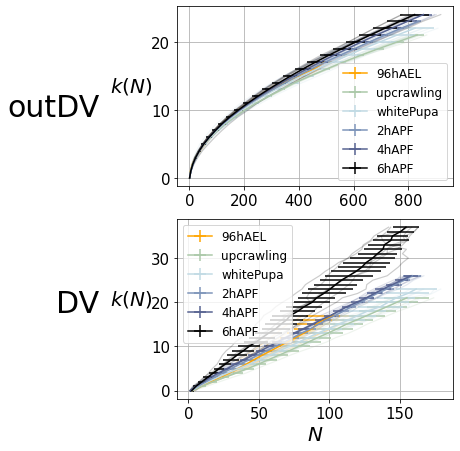

In [14]:
get_superPlot(devstages = devstages, color_dict = color_dict)

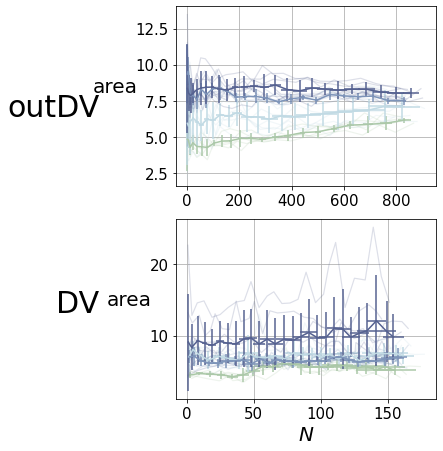

In [16]:
get_superPlot(x_col='cumcount', y_col='area', xlabel = r'$N$', ylabel = 'area', legend = False)

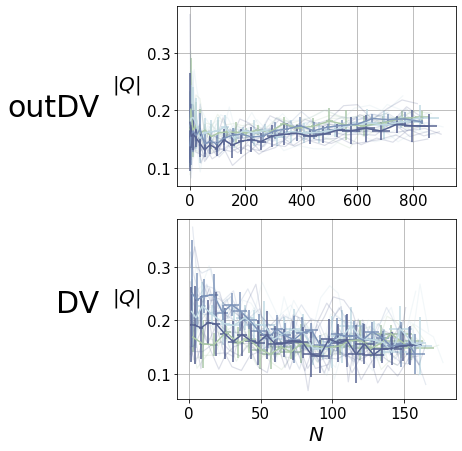

In [17]:
get_superPlot(x_col='cumcount', y_col='elongation_tensor_norm_max', xlabel = r'$N$', ylabel = r'$|Q|$', legend = False)

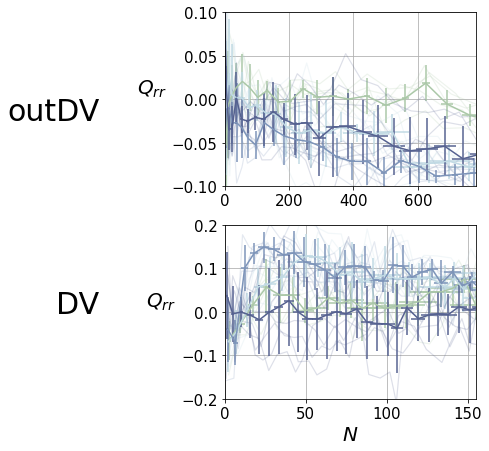

In [80]:
get_superPlot(x_col='cumcount', y_col='Qrr_geom_inPlane', xlabel = r'$N$', ylabel = r'$Q_{rr}$', legend = False, super_label_pad=100, ylim_DV=(-0.2, 0.2), ylim_outDV=(-0.1, 0.1), filename = 'plots/Qrr_all_stages.pdf')

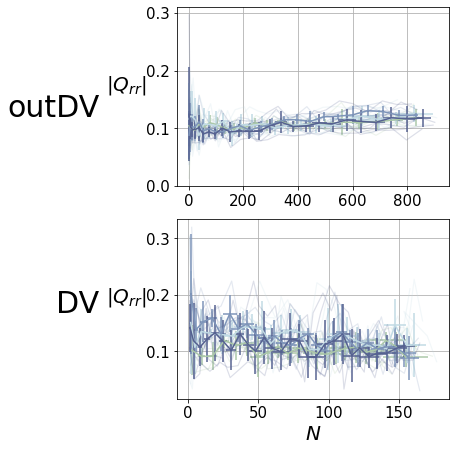

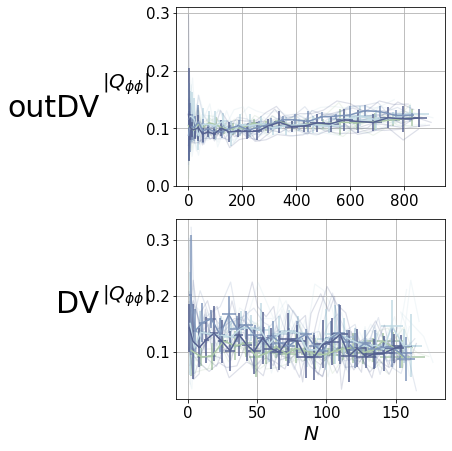

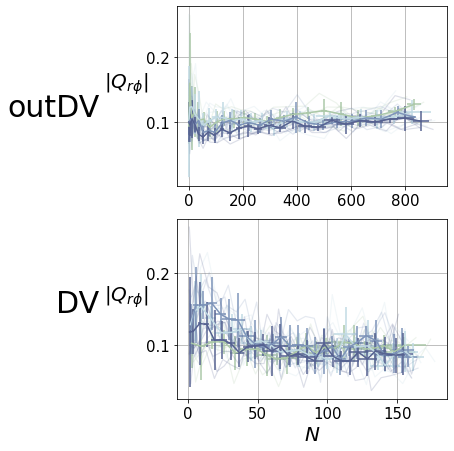

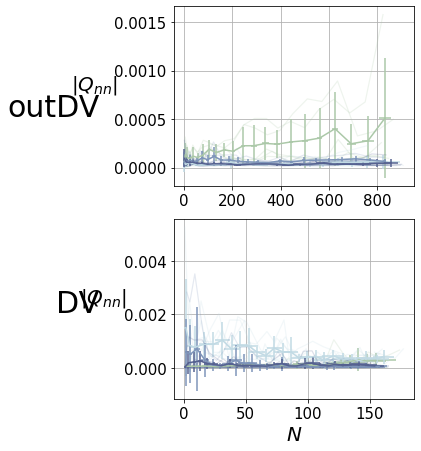

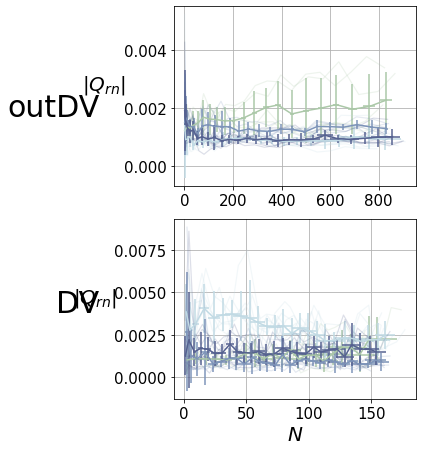

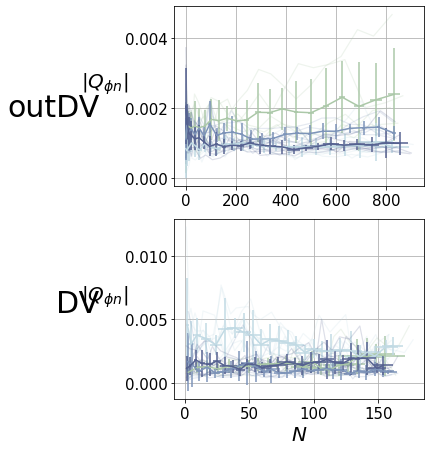

In [19]:
get_superPlot(x_col='cumcount', y_col='Qrr_abs', xlabel = r'$N$', ylabel = r'$|Q_{rr}|$', legend = False)

get_superPlot(x_col='cumcount', y_col='Qphiphi_abs', xlabel = r'$N$', ylabel = r'$|Q_{\phi \phi}|$', legend = False)

get_superPlot(x_col='cumcount', y_col='Qrphi_abs', xlabel = r'$N$', ylabel = r'$|Q_{r \phi}|$', legend = False)

get_superPlot(x_col='cumcount', y_col='Qnn_abs', xlabel = r'$N$', ylabel = r'$|Q_{nn}|$', legend = False)

get_superPlot(x_col='cumcount', y_col='Qrn_abs', xlabel = r'$N$', ylabel = r'$|Q_{rn}|$', legend = False)

get_superPlot(x_col='cumcount', y_col='Qphin_abs', xlabel = r'$N$', ylabel = r'$|Q_{\phi n}|$', legend = False)

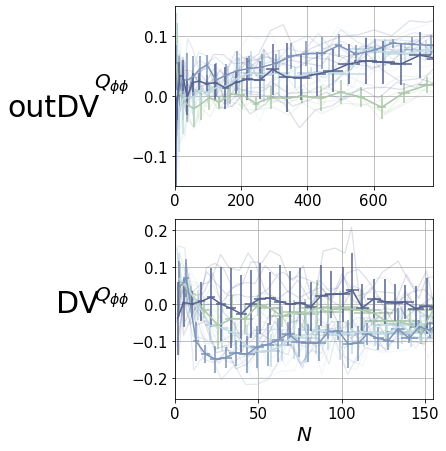

In [82]:
get_superPlot(x_col='cumcount', y_col='Qphiphi', xlabel = r'$N$', ylabel = r'$Q_{\phi \phi}$', legend = False, ylim_outDV= (-0.15, 0.15), filename = 'plots/Qphiphi_all_stages.pdf')

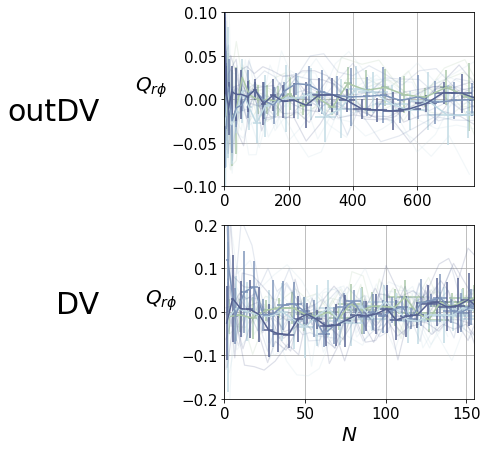

In [70]:
get_superPlot(x_col='cumcount', y_col='Qrphi', xlabel = r'$N$', ylabel = r'$Q_{r \phi}$', legend = False, ylim_outDV=(-0.1,0.1), ylim_DV=(-0.2,0.2), super_label_pad=100, filename='plots/Qrphi_allstages.pdf')

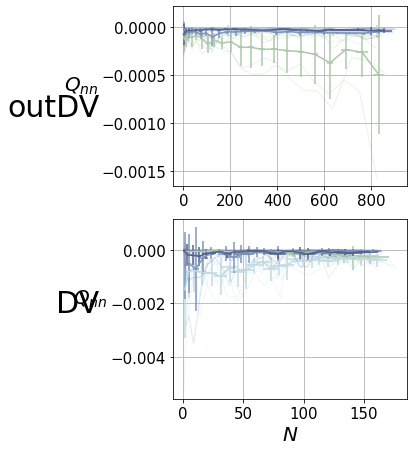

In [22]:
get_superPlot(x_col='cumcount', y_col='Qnn', xlabel = r'$N$', ylabel = r'$Q_{nn}$', legend = False)

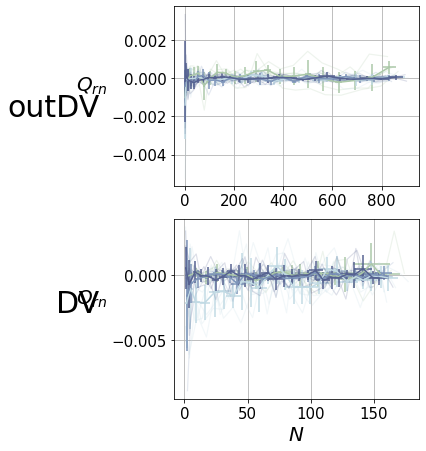

In [23]:
get_superPlot(x_col='cumcount', y_col='Qrn', xlabel = r'$N$', ylabel = r'$Q_{rn}$', legend = False)

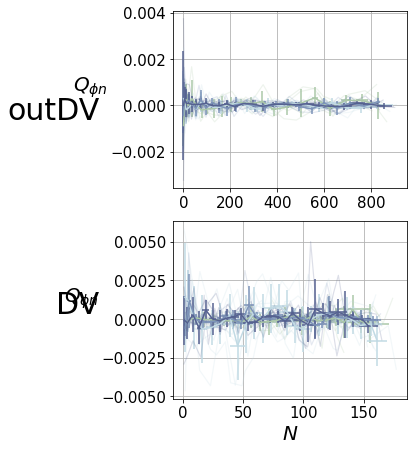

In [24]:
get_superPlot(x_col='cumcount', y_col='Qphin', xlabel = r'$N$', ylabel = r'$Q_{\phi n}$', legend = False)

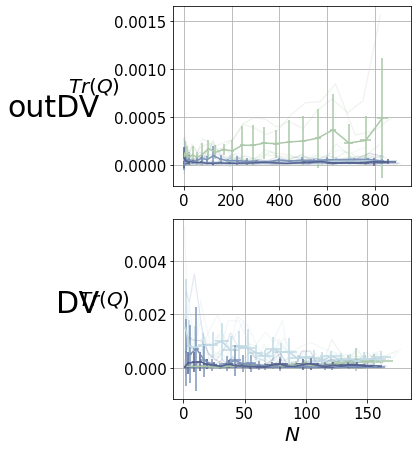

In [25]:
get_superPlot(x_col='cumcount', y_col='Q_trace_2D', xlabel = r'$N$', ylabel = r'$Tr(Q)$', legend = False)

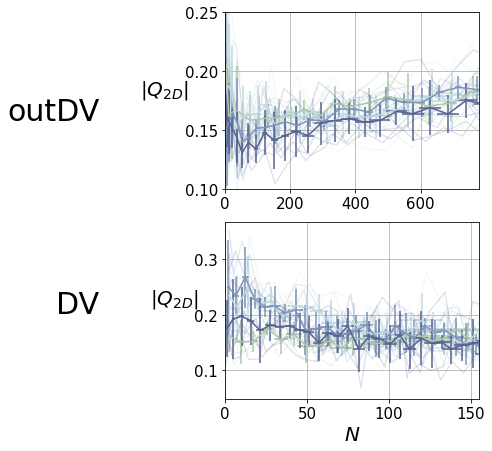

In [71]:
get_superPlot(x_col='cumcount', y_col='Qnorm_2D', xlabel = r'$N$', ylabel = r'$|Q_{2D}|$', legend = False, super_label_pad=100, ylim_outDV=(0.1,0.25), filename = 'plots/norm_Q_2D_allstages.pdf')

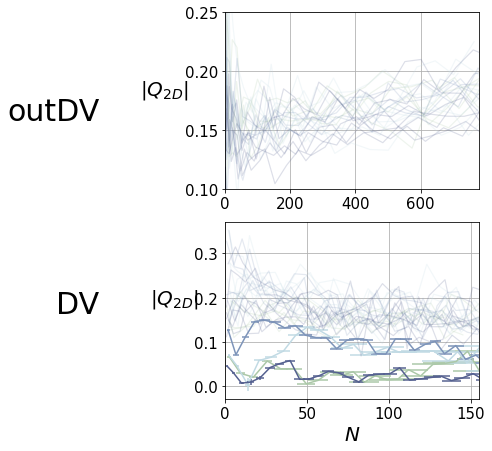

In [27]:
get_superPlot(x_col='cumcount', y_col='Qnorm_2D', xlabel = r'$N$', ylabel = r'$|Q_{2D}|$', legend = False, super_label_pad=100, ylim_outDV=(0.1,0.25), #filename = 'plots/norm_Q_2D_allstages.pdf'
             )

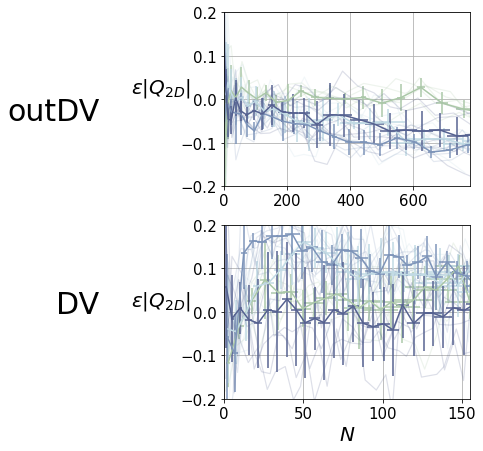

In [75]:
get_superPlot(x_col='cumcount', y_col='signed_Qnorm_2D', xlabel = r'$N$', ylabel = r'$\varepsilon|Q_{2D}|$', legend = False, super_label_pad=100, ylim_DV=(-0.2,0.2), ylim_outDV=(-0.2, 0.2), filename='plots/signed_Q_norm_2D_allstages.pdf')

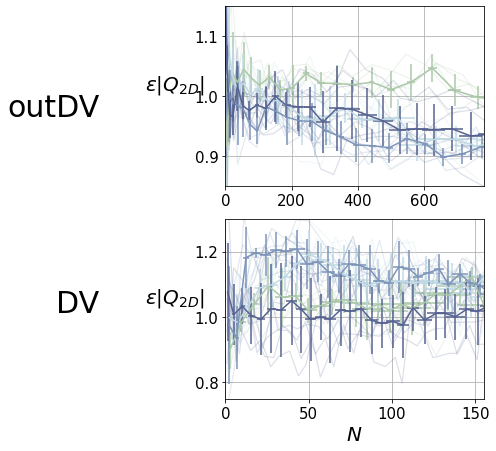

In [79]:
get_superPlot(x_col='cumcount', y_col='exp_signed_Qnorm_2D', xlabel = r'$N$', ylabel = r'$\varepsilon|Q_{2D}|$', legend = False, super_label_pad=100, 
              ylim_DV=(0.75,1.3), ylim_outDV=(0.85, 1.15), 
              filename='plots/exp_signed_Q_norm_2D_allstages.pdf')

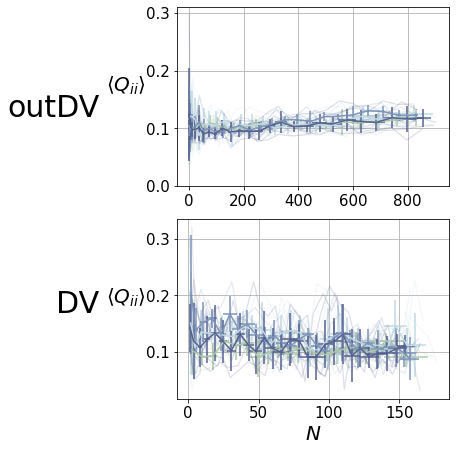

In [27]:
get_superPlot(x_col='cumcount', y_col='Qii_mean', xlabel = r'$N$', ylabel = r'$\langle Q_{ii} \rangle$', legend = False)

In [41]:
df_pool_k

,devstage,region,discName,k_dist,area,neighbour_number,elongation_tensor_norm_max,Qrr_geom_inPlane,Qphiphi,Qnn,...,Q_trace_2D,Qii_mean_square,Qii_mean,Qnorm_2D,Qrr_abs,Qphiphi_abs,Qrphi_abs,Qphin_abs,Qnn_abs,Qrn_abs
0,120hAEL,DV,20220517_ecadGFPnbG4_120hAEL_disc1_DV,0,3.684915,6.000000,0.303232,-0.114555,0.122031,-0.007476,...,0.007476,0.076217,0.260359,0.298340,0.259655,0.260977,0.124813,0.012518,0.007476,0.014833
1,120hAEL,DV,20220517_ecadGFPnbG4_120hAEL_disc1_DV,1,3.421224,6.090909,0.165618,0.020155,-0.016260,-0.003896,...,0.003896,0.017143,0.108246,0.162416,0.108675,0.107670,0.103273,0.008889,0.004161,0.012091
2,120hAEL,DV,20220517_ecadGFPnbG4_120hAEL_disc1_DV,2,3.698786,5.923077,0.141715,0.016306,-0.012718,-0.003588,...,0.003588,0.015824,0.108523,0.138330,0.108540,0.108393,0.065625,0.011816,0.004211,0.010366
3,120hAEL,DV,20220517_ecadGFPnbG4_120hAEL_disc1_DV,3,3.576688,6.000000,0.167031,0.014818,-0.010471,-0.004347,...,0.004347,0.011721,0.082766,0.160762,0.081469,0.083891,0.118068,0.013327,0.004721,0.011263
4,120hAEL,DV,20220517_ecadGFPnbG4_120hAEL_disc1_DV,4,3.827959,6.272727,0.197543,0.062781,-0.055402,-0.007379,...,0.007379,0.026176,0.135950,0.192042,0.133338,0.137833,0.119671,0.013293,0.008791,0.013547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,whitePupa,outDV,20201029_ecadGFPnbG4_whitepupa_disc5_outDV,18,8.220419,5.849057,0.177117,-0.069942,0.069957,-0.000015,...,0.000015,0.019897,0.115862,0.177097,0.115858,0.115867,0.108808,0.000888,0.000026,0.001116
1963,whitePupa,outDV,20201029_ecadGFPnbG4_whitepupa_disc5_outDV,19,7.895107,5.907407,0.203789,-0.083233,0.083328,-0.000094,...,0.000094,0.029634,0.135344,0.203714,0.135349,0.135338,0.120176,0.001282,0.000105,0.001259
1964,whitePupa,outDV,20201029_ecadGFPnbG4_whitepupa_disc5_outDV,20,7.745324,5.910714,0.209018,-0.092874,0.093029,-0.000155,...,0.000155,0.027606,0.137187,0.208897,0.137224,0.137148,0.123246,0.001713,0.000158,0.001758
1965,whitePupa,outDV,20201029_ecadGFPnbG4_whitepupa_disc5_outDV,21,8.545621,6.035714,0.197338,-0.109374,0.109500,-0.000127,...,0.000127,0.028051,0.135034,0.197131,0.134979,0.135088,0.116345,0.002214,0.000187,0.001744


### Archive

[]

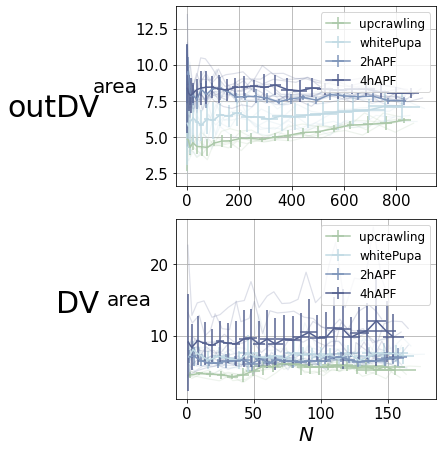

In [297]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']
devstages = ['upcrawling','whitePupa','2hAPF','4hAPF',]

nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (5.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = ''
        if (j == 0) or (nbcols == 1):
            ylabel = 'area'
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$N$'
        if roi == 'DV':
            xticks = [0, 50, 100, 150]
            #yticks = [0, 10, 20]
            xlim = (-5,155)
            #ylim = (-2, 27)
        else:
            xticks = [0, 250, 500, 750]
            #yticks = [0, 10, 20]
            xlim = (-10,780)
            #ylim = (-2, 27)
        
        ax = get_subplot(ax, df = df_pool_k, 
                         stat_df = df_pool_devstage, 
                         df_cases_col='discName',
                         query_str = query_str, x_col = 'cumcount', y_col = 'area', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         #xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =1.5,
                         mean_label=devstage, ylabelpad = 20,
                        )
        
    ax.grid()
    ax.legend(fontsize = 12)
    
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 50, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/k_vs_N.pdf', bbox_inches = 'tight')


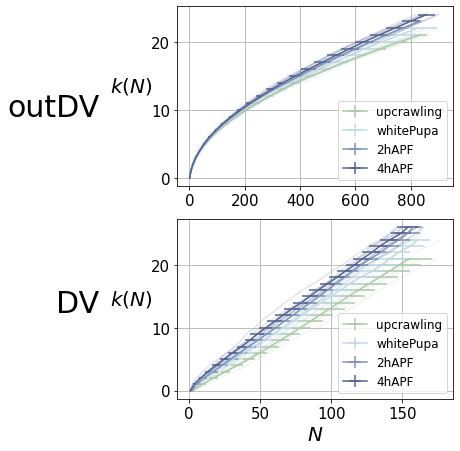

In [180]:
get_superPlot(x_col = 'cumcount', y_col = 'area')

[]

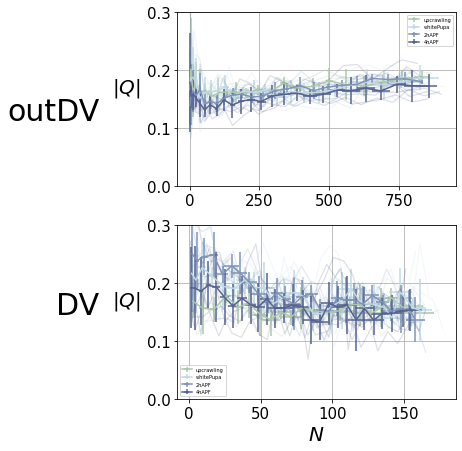

In [177]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']
devstages = ['upcrawling','whitePupa','2hAPF','4hAPF',]

nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (5.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = ''
        if (j == 0) or (nbcols == 1):
            ylabel = r'$|Q|$'
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$N$'
        if roi == 'DV':
            xticks = [0, 50, 100, 150]
            #yticks = [0, 10, 20]
            #xlim = (-5,155)
            ylim = (0,0.3)
        else:
            xticks = [0, 250, 500, 750]
            #yticks = [0, 10, 20]
            #xlim = (-10,780)
            ylim = (0, 0.3)
        
        ax = get_subplot(ax, df = df_pool_k, 
                         stat_df = df_pool_devstage, 
                         df_cases_col='discName',
                         query_str = query_str, x_col = 'cumcount', y_col = 'elongation_tensor_norm_max', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =1.5,
                         mean_label=devstage, ylabelpad = 20,
                        )
        
    ax.grid()
    ax.legend(fontsize = 5)
    
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 50, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



#os.makedirs('plots/',exist_ok=True)
#plt.savefig('plots/k_vs_N.pdf', bbox_inches = 'tight')


### Archive

In [ ]:
# Load data

#object_file = pickle.load('Jana_data/DFallDiscslimitcounts.pkl')
df = pd.read_csv('data/DFallDiscslimitcounts.csv', index_col=0)
df = df[df['genotype'] == 'ecadGFPnbG4']


rois = ['outDV', 'DV']
devstages = ['upcrawling','whitePupa','2hAPF','4hAPF','6hAPF']

In [ ]:
# get N cumulative vs ring number

[k_N_alldiscs, k_N_mean] = analyze_ring_cell_numbers(df, devstages = devstages)

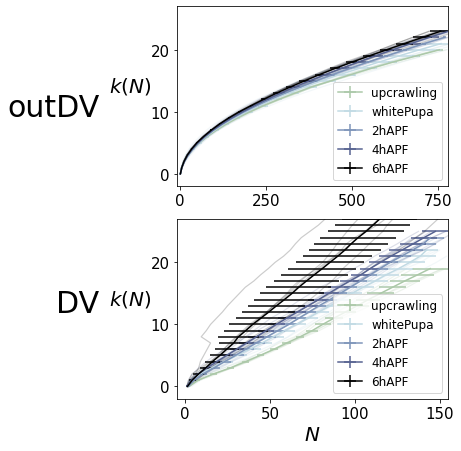

In [10]:
#rois = ['outDV', 'DV']
#devstages = ['upcrawling','whitePupa','2hAPF','4hAPF']


nbcols = 1
nbrows = len(rois)

fig,axs = plt.subplots(nbrows, nbcols,
                       figsize = (5.5*nbcols, (10/3)*nbrows)
                      )
main_ax = fig.add_subplot(111, frameon=False)


for i in range(nbrows):
    
    roi = rois[i]
    
    for j in range(len(devstages)):
        
        devstage = devstages[j]
        query_str = '(devstage == "' + devstage + '") & (roi == "' + roi + '")'
        
        if nbcols == 1:
            ax = axs[i]
        elif nbrows == 1:
            ax = axs[j]
        else:
            ax = axs[i,j]
            
        title = ''
        ylabel = ''
        xlabel = ''
        xticks = None
        yticks = None
        xlim = None
        ylim = None
        if i == 0:
            title = ''
        if (j == 0) or (nbcols == 1):
            ylabel = r'$k(N)$'
        if (i == nbrows-1) or (nbrows == 1):
            xlabel = r'$N$'
        if roi == 'DV':
            xticks = [0, 50, 100, 150]
            yticks = [0, 10, 20]
            xlim = (-5,155)
            ylim = (-2, 27)
        else:
            xticks = [0, 250, 500, 750]
            yticks = [0, 10, 20]
            xlim = (-10,780)
            ylim = (-2, 27)
        
        ax = get_subplot(ax, df = k_N_alldiscs, stat_df = k_N_mean, df_cases_col='disc',
                         query_str = query_str, x_col = 'N_cum', y_col = 'k_dist', 
                         xlabel = xlabel, ylabel = ylabel, title = title,
                         xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                         individual_color=color_dict[devstage],individual_linewidth =1.2, 
                         mean_color=color_dict[devstage],mean_linewidth =1.5,
                         mean_label=devstage, ylabelpad = 20,
                        )
        
    ax.grid()
    ax.legend(fontsize = 12)
    
fig.tight_layout()

plt.xlabel('', fontsize = 40, labelpad = 30)
plt.ylabel('', fontsize = 40, labelpad = 70, rotation = 0)

plt.xlim(-0.5,nbcols -0.5)
plt.ylim(-0.5, nbrows -0.5)
        
#tick_intervals_x = col_vals
tick_intervals_y = [0, 1]

#tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
tick_intervals_y_str = ['DV', 'outDV']

main_ax.tick_params(axis=u'both', which=u'both', length = 0, labelsize = 15, pad = 50, rotation = 0)

#plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = 40)
main_ax.set_yticks(tick_intervals_y)
main_ax.set_yticklabels(tick_intervals_y_str, fontsize = 30, x = -0.1)

#main_ax.axvline(x = 0.42, color = 'blue', linewidth = 5)

main_ax.set_xticks([])
#plt.yticks([], [], fontsize = 40)



os.makedirs('plots/',exist_ok=True)
plt.savefig('plots/k_vs_N.pdf', bbox_inches = 'tight')


In [12]:
k_N_alldiscs

,devstage,disc,k_dist,N_cum,roi
0,upcrawling,20201013_ecadGFPnbG4_upcrawling_disc3_outDV,0.0,1.0,outDV
1,upcrawling,20201013_ecadGFPnbG4_upcrawling_disc3_outDV,1.0,4.0,outDV
2,upcrawling,20201013_ecadGFPnbG4_upcrawling_disc3_outDV,2.0,10.5,outDV
3,upcrawling,20201013_ecadGFPnbG4_upcrawling_disc3_outDV,3.0,20.5,outDV
4,upcrawling,20201013_ecadGFPnbG4_upcrawling_disc3_outDV,4.0,36.0,outDV
...,...,...,...,...,...
1462,6hAPF,20210125_ecadGFPnbG4_6hAPF_disc2_DV,31.0,136.5,DV
1463,6hAPF,20210125_ecadGFPnbG4_6hAPF_disc2_DV,32.0,140.5,DV
1464,6hAPF,20210125_ecadGFPnbG4_6hAPF_disc2_DV,33.0,144.5,DV
1465,6hAPF,20210125_ecadGFPnbG4_6hAPF_disc2_DV,34.0,148.5,DV


In [13]:
k_N_mean

,devstage,k_dist,N_cum_mean,N_cum_std,roi
0,2hAPF,0.0,1.000000,0.000000,outDV
1,2hAPF,1.0,4.500000,0.353553,outDV
2,2hAPF,2.0,12.000000,0.935414,outDV
3,2hAPF,3.0,22.800000,1.680774,outDV
4,2hAPF,4.0,37.200000,2.659887,outDV
...,...,...,...,...,...
239,whitePupa,18.0,118.428571,7.801862,DV
240,whitePupa,19.0,125.785714,8.731443,DV
241,whitePupa,20.0,132.357143,9.200155,DV
242,whitePupa,21.0,138.500000,9.082951,DV


In [ ]:
def get_mean_quantity(df, k_N_alldiscs, k_N_mean, quantity_name):
    
    # pick any quantity(ies) in df
    #get the mean of it within a ring in each disc
    #get the mean between discs for given stage and N_cum
    
    discs = np.unique(k_N_alldiscs['disc'])
    
    
    
    
    return([k_N_alldiscs, k_N_mean])

In [ ]:
# pick any quantity(ies) in df
#get the mean of it within a ring in each disc
#get the mean between discs for given stage and N_cum

quantities = ['area']

[k_N_alldiscs, k_N_mean] = get_mean_quantity(df, k_N_alldiscs, k_N_mean, quantity_name)

In [24]:
df.columns

Index(['devstage', 'cell_id', 'frame', 'center_x', 'center_y', 'center_z',
       'area', 'normal_x', 'normal_y', 'normal_z', 'neighbour_number',
       'elongation_tensor_norm_max', 'mean_curvature', 'gaussian_curvature',
       'k_fromDV', 'k_dist', 'angle_toCenter', 'Qrr_geom_inPlane',
       'k_dist_pathlength', 'roi', 'disc', 'genotype', 'k_OUTreversed',
       'k_OUT', 'k_Geom', 'Qrr', 'Qrr_Geom', 'discName', 'countInBin',
       'cumcount', 'region', 'largestContBinDisc'],
      dtype='object')

In [49]:
df_pool_k = df.groupby(['devstage', 'region', 'discName', 'k_dist']).agg('mean').reset_index() #here we pool cells within a ring and calculate the mean and std
df_pool_k

,devstage,region,discName,k_dist,area,neighbour_number,elongation_tensor_norm_max,Qrr_geom_inPlane,Qphiphi,Qnn,Qrphi,Qrn,Qphin,countInBin,cumcount
0,120hAEL,DV,20220517_ecadGFPnbG4_120hAEL_disc1_DV,0,3.684915,6.000000,0.303232,-0.114555,0.122031,-0.007476,-0.060038,0.014833,-0.010556,2.5,2.5
1,120hAEL,DV,20220517_ecadGFPnbG4_120hAEL_disc1_DV,1,3.421224,6.090909,0.165618,0.020155,-0.016260,-0.003896,-0.057868,0.003971,0.001362,5.5,8.0
2,120hAEL,DV,20220517_ecadGFPnbG4_120hAEL_disc1_DV,2,3.698786,5.923077,0.141715,0.016306,-0.012718,-0.003588,0.013672,0.002583,-0.001037,6.5,14.5
3,120hAEL,DV,20220517_ecadGFPnbG4_120hAEL_disc1_DV,3,3.576688,6.000000,0.167031,0.014818,-0.010471,-0.004347,-0.058409,-0.001209,-0.009651,6.0,20.5
4,120hAEL,DV,20220517_ecadGFPnbG4_120hAEL_disc1_DV,4,3.827959,6.272727,0.197543,0.062781,-0.055402,-0.007379,0.042510,-0.008935,-0.003217,5.5,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,whitePupa,outDV,20201029_ecadGFPnbG4_whitepupa_disc5_outDV,18,8.220419,5.849057,0.177117,-0.069942,0.069957,-0.000015,-0.031785,0.000114,-0.000060,53.0,535.0
1963,whitePupa,outDV,20201029_ecadGFPnbG4_whitepupa_disc5_outDV,19,7.895107,5.907407,0.203789,-0.083233,0.083328,-0.000094,-0.045402,0.000064,-0.000020,54.0,589.0
1964,whitePupa,outDV,20201029_ecadGFPnbG4_whitepupa_disc5_outDV,20,7.745324,5.910714,0.209018,-0.092874,0.093029,-0.000155,-0.065606,-0.000562,-0.000240,56.0,645.0
1965,whitePupa,outDV,20201029_ecadGFPnbG4_whitepupa_disc5_outDV,21,8.545621,6.035714,0.197338,-0.109374,0.109500,-0.000127,-0.041945,-0.000522,-0.000543,56.0,701.0


In [52]:
df_pool_devstage = df_pool_k.groupby(['devstage', 'region', 'k_dist']).agg(['mean', 'std']).reset_index()

#df_pool_devstage['cumcount']
df_pool_devstage

devstage region k_dist      area           neighbour_number            \
                                  mean       std             mean       std   
0      120hAEL     DV      0  3.607816  0.571796         6.105000  0.194776   
1      120hAEL     DV      1  3.579710  0.416320         6.067545  0.159213   
2      120hAEL     DV      2  3.645264  0.270162         5.921988  0.055917   
3      120hAEL     DV      3  3.283401  0.320536         5.826324  0.236088   
4      120hAEL     DV      4  4.079865  0.620094         6.285379  0.186086   
..         ...    ...    ...       ...       ...              ...       ...   
326  whitePupa  outDV     18  6.688088  1.190456         5.884777  0.082454   
327  whitePupa  outDV     19  6.759391  0.981783         5.910470  0.072039   
328  whitePupa  outDV     20  6.863613  0.733592         5.893194  0.062491   
329  whitePupa  outDV     21  7.116713  1.126464         5.942935  0.065402   
330  whitePupa  outDV     22  7.089219  0.926383         5.897481  0.071830   

    elongation_tensor_norm_max           Qrr_geom_inPlane  ...     Qrphi  \
                          mean       std             mean  ...      mean   
0                     0.175817  0.071657        -0.067140  ...  0.011402   
1                     0.164267  0.015779        -0.016703  ... -0.050916   
2                     0.188097  0.032758         0.018228  ...  0.015330   
3                     0.179828  0.015521         0.043464  ...  0.000647   
4                     0.171307  0.022487         0.032321  ...  0.050822   
..                         ...       ...              ...  ...       ...   
326                   0.174673  0.014185        -0.078118  ... -0.012694   
327                   0.179151  0.022586        -0.073665  ... -0.001880   
328                   0.174685  0.024181        -0.071145  ... -0.018547   
329                   0.179805  0.010356        -0.077818  ... -0.017681   
330                   0.187440  0.021683        -0.074259  ... -0.014985   

                    Qrn               Qphin           countInBin            \
          std      mean       std      mean       std       mean       std   
0    0.053600  0.005074  0.006246 -0.002911  0.004661   3.400000  0.821584   
1    0.042578 -0.001190  0.004238  0.001115  0.001970   7.100000  1.294218   
2    0.021060  0.000400  0.001474 -0.000273  0.005742   7.900000  1.193734   
3    0.061811 -0.000409  0.003785 -0.000631  0.005766   8.200000  1.440486   
4    0.034662 -0.003515  0.003225 -0.002810  0.004636   7.000000  1.172604   
..        ...       ...       ...       ...       ...        ...       ...   
326  0.022459 -0.000065  0.000112 -0.000108  0.000160  56.000000  3.109126   
327  0.033706  0.000078  0.000102  0.000105  0.000222  58.285714  4.644505   
328  0.034551 -0.000086  0.000296 -0.000110  0.000090  61.142857  3.976119   
329  0.026595 -0.000060  0.000272 -0.000090  0.000221  62.571429  4.429339   
330  0.042832  0.000073  0.000095  0.000026  0.000176  64.857143  4.099942   

       cumcount             
           mean        std  
0      3.400000   0.821584  
1     10.500000   1.802776  
2     18.400000   2.859196  
3     26.600000   4.263215  
4     33.600000   5.212965  
..          ...        ...  
326  577.285714  54.260834  
327  635.571429  58.767500  
328  696.714286  62.093248  
329  759.285714  65.515175  
330  824.142857  69.085523  

[331 rows x 25 columns]

In [32]:
df_pool_k[('Qrr_geom_inPlane', 'mean')]

0      -0.053657
1      -0.052563
2       0.023527
3       0.100472
4       0.033369
          ...   
1962   -0.031307
1963   -0.031909
1964   -0.078324
1965   -0.080264
1966   -0.117061
Name: (Qrr_geom_inPlane, mean), Length: 1967, dtype: float64

### Archive

In [5]:
columns = ['devstage', 'discName', 'region', 'k_dist', 
           'area','neighbour_number','elongation_tensor_norm_max', 
           'Qrr_geom_inPlane', 'Qphiphi', 'Qnn', 'Qrphi', 'Qrn', 'Qphin',
           'countInBin', 'cumcount',
          ]

df = df[columns]

In [6]:
df

,devstage,discName,region,k_dist,area,neighbour_number,elongation_tensor_norm_max,Qrr_geom_inPlane,Qphiphi,Qnn,Qrphi,Qrn,Qphin,countInBin,cumcount
0,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8_outDV,outDV,13,1.646873,4,0.079496,-0.067196,0.057796,0.009400,0.028307,0.003153,0.033112,42.0,288.0
1,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8_outDV,outDV,13,6.991516,7,0.297667,-0.283664,0.292342,-0.008678,-0.037189,-0.008933,0.029461,42.0,288.0
2,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8_outDV,outDV,13,9.529885,6,0.178425,-0.045595,0.057785,-0.012190,-0.163516,-0.004206,0.012595,42.0,288.0
3,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8_outDV,outDV,13,4.962586,5,0.329087,0.092884,-0.091570,-0.001314,0.314386,-0.010496,-0.013037,42.0,288.0
4,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8_outDV,outDV,13,5.680147,7,0.135623,0.061222,-0.057461,-0.003761,-0.119059,0.006470,-0.008505,42.0,288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115351,6hAPF,20210125_ecadGFPnbG4_6hAPF_disc2_DV,DV,4,12.520955,6,0.120471,-0.117953,0.120222,-0.002269,0.002026,-0.013175,-0.005201,1.0,4.0
115352,6hAPF,20210125_ecadGFPnbG4_6hAPF_disc2_DV,DV,4,17.469669,6,0.137818,-0.077337,0.077540,-0.000203,0.113857,-0.002807,-0.000412,3.0,4.0
115353,6hAPF,20210125_ecadGFPnbG4_6hAPF_disc2_DV,DV,4,14.469570,8,0.094490,0.031300,-0.017401,-0.013899,-0.059352,0.037917,-0.033725,3.0,4.0
115354,6hAPF,20210125_ecadGFPnbG4_6hAPF_disc2_DV,DV,4,14.921358,7,0.211711,0.059808,-0.057158,-0.002650,-0.202094,-0.004247,-0.004979,3.0,4.0


In [14]:
df_mean_grouped = df.groupby(['discName', 'k_dist']).mean()
df_std_grouped = df.groupby(['discName', 'k_dist']).std()

In [ ]:
df_aggregated = df.groupby(['discName', 'k_dist']).agg

In [23]:
df_mean_grouped

In [12]:
for key,group in df_mean_grouped:
    
    print('key ', key)
    #print('group ', group)
    print('#####')

key  ('20201013_ecadGFPnbG4_upcrawling_disc3_DV', 0)
#####
key  ('20201013_ecadGFPnbG4_upcrawling_disc3_DV', 1)
#####
key  ('20201013_ecadGFPnbG4_upcrawling_disc3_DV', 2)
#####
key  ('20201013_ecadGFPnbG4_upcrawling_disc3_DV', 3)
#####
key  ('20201013_ecadGFPnbG4_upcrawling_disc3_DV', 4)
#####
key  ('20201013_ecadGFPnbG4_upcrawling_disc3_DV', 5)
#####
key  ('20201013_ecadGFPnbG4_upcrawling_disc3_DV', 6)
#####
key  ('20201013_ecadGFPnbG4_upcrawling_disc3_DV', 7)
#####
key  ('20201013_ecadGFPnbG4_upcrawling_disc3_DV', 8)
#####
key  ('20201013_ecadGFPnbG4_upcrawling_disc3_DV', 9)
#####
key  ('20201013_ecadGFPnbG4_upcrawling_disc3_DV', 10)
#####
key  ('20201013_ecadGFPnbG4_upcrawling_disc3_DV', 11)
#####
key  ('20201013_ecadGFPnbG4_upcrawling_disc3_DV', 12)
#####
key  ('20201013_ecadGFPnbG4_upcrawling_disc3_DV', 13)
#####
key  ('20201013_ecadGFPnbG4_upcrawling_disc3_DV', 14)
#####
key  ('20201013_ecadGFPnbG4_upcrawling_disc3_DV', 15)
#####
key  ('20201013_ecadGFPnbG4_upcrawling_disc3_DV', 

In [17]:
a = df.groupby(['discName', 'k_dist']).describe()

In [280]:
thickness = 0.1
coeffs = np.array([-0.22, 1.22])*thickness
obj_poly = np.poly1d(coeffs)
obj_poly(0)

0.122

In [ ]:
print()

In [26]:
df_mean_grouped.get_group(('20220517_ecadGFPnbG4_96hAEL_disc8_outDV',14))

,devstage,discName,region,k_dist,area,neighbour_number,elongation_tensor_norm_max,Qrr_geom_inPlane,Qphiphi,Qnn,Qrphi,Qrn,Qphin,countInBin,cumcount
1138,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8_outDV,outDV,14,4.364530,6,0.360893,-0.231762,0.234939,-0.003177,-0.273081,-0.011669,-0.012105,40.0,321.0
1139,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8_outDV,outDV,14,5.958748,5,0.195601,-0.142863,0.142768,0.000095,0.133602,0.000360,-0.004486,40.0,321.0
1140,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8_outDV,outDV,14,9.137689,7,0.244880,-0.179825,0.185273,-0.005448,-0.159070,-0.013647,-0.002422,40.0,321.0
1141,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8_outDV,outDV,14,7.873588,8,0.262601,-0.079041,0.100651,-0.021610,0.235205,0.003123,0.000365,40.0,321.0
1142,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8_outDV,outDV,14,4.261754,5,0.210115,0.190445,-0.193055,0.002610,0.089053,-0.002579,0.012854,40.0,321.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8_outDV,outDV,14,6.151957,6,0.389380,-0.331438,0.337415,-0.005978,0.192836,-0.013610,-0.008547,40.0,321.0
1214,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8_outDV,outDV,14,2.438408,6,0.314051,0.040490,-0.021621,-0.018869,0.300407,0.027208,0.013829,40.0,321.0
1215,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8_outDV,outDV,14,3.148529,6,0.375202,-0.264036,0.268408,-0.004372,0.260981,0.011936,-0.014474,40.0,321.0
1216,96hAEL,20220517_ecadGFPnbG4_96hAEL_disc8_outDV,outDV,14,3.870429,5,0.177853,-0.101384,0.098383,0.003001,0.148870,-0.001378,-0.003514,40.0,321.0


In [15]:
df_mean_grouped

cell_id  frame  \
discName                                 k_dist                        
20201013_ecadGFPnbG4_upcrawling_disc3_DV 1       10755.400000    0.0   
                                         2       11029.000000    0.0   
                                         3       11410.500000    0.0   
                                         4       11744.291667    0.0   
                                         5       11413.722222    0.0   
...                                                       ...    ...   
20210818_ecadGFPnbG4_96hAEL_disc4_outDV  7       10813.479167    0.0   
                                         8       10790.654545    0.0   
                                         9       10801.949153    0.0   
                                         10      10798.539683    0.0   
                                         11      10758.823529    0.0   

                                                   center_x    center_y  \
discName                                 k_dist                           
20201013_ecadGFPnbG4_upcrawling_disc3_DV 1       218.851393  154.392967   
                                         2       219.166081  154.682597   
                                         3       219.851939  155.480147   
                                         4       219.861602  155.769967   
                                         5       220.658412  155.615226   
...                                                     ...         ...   
20210818_ecadGFPnbG4_96hAEL_disc4_outDV  7       157.536183  144.656604   
                                         8       156.196646  147.784759   
                                         9       157.910720  145.941142   
                                         10      157.662582  145.659809   
                                         11      158.060915  122.469425   

                                                   center_z      area  \
discName                                 k_dist                         
20201013_ecadGFPnbG4_upcrawling_disc3_DV 1      -113.174736  5.206240   
                                         2      -113.000618  5.516242   
                                         3      -112.756992  4.281863   
                                         4      -112.728923  4.242839   
                                         5      -112.997743  5.037971   
...                                                     ...       ...   
20210818_ecadGFPnbG4_96hAEL_disc4_outDV  7       -15.563735  5.078470   
                                         8       -16.645369  5.540869   
                                         9       -17.158196  5.690027   
                                         10      -17.804337  5.918783   
                                         11      -12.790279  6.153230   

                                                 normal_x  normal_y  normal_z  \
discName                                 k_dist                                 
20201013_ecadGFPnbG4_upcrawling_disc3_DV 1       0.042519  0.279984 -0.955358   
                                         2       0.038219  0.279743 -0.957112   
                                         3       0.019527  0.263739 -0.962630   
                                         4       0.013444  0.263697 -0.962111   
                                         5       0.006540  0.267039 -0.958840   
...                                                   ...       ...       ...   
20210818_ecadGFPnbG4_96hAEL_disc4_outDV  7       0.139506  0.254605  0.930664   
                                         8       0.113735  0.278439  0.919599   
                                         9       0.139104  0.244915  0.912990   
                                         10      0.130457  0.229258  0.905507   
                                         11      0.158147 -0.098105  0.945523   

                                                 neighbour_number  ...  \
discName                                 k_dist                

In [34]:
df_std_grouped

area  neighbour_number  \
discName                                 k_dist                               
20201013_ecadGFPnbG4_upcrawling_disc3_DV 0       1.785865          1.032796   
                                         1       1.715241          0.887300   
                                         2       2.038975          0.790820   
                                         3       2.041309          0.860048   
                                         4       1.493701          0.662164   
...                                                   ...               ...   
20220517_ecadGFPnbG4_96hAEL_disc8_outDV  10      2.012898          1.000745   
                                         11      1.642827          0.962183   
                                         12      2.183435          0.878871   
                                         13      2.034290          0.840383   
                                         14      2.829722          0.772961   

                                                 elongation_tensor_norm_max  \
discName                                 k_dist                               
20201013_ecadGFPnbG4_upcrawling_disc3_DV 0                         0.101411   
                                         1                         0.068280   
                                         2                         0.052023   
                                         3                         0.090845   
                                         4                         0.068862   
...                                                                     ...   
20220517_ecadGFPnbG4_96hAEL_disc8_outDV  10                        0.101753   
                                         11                        0.103952   
                                         12                        0.105099   
                                         13                        0.105838   
                                         14                        0.108160   

                                                 Qrr_geom_inPlane   Qphiphi  \
discName                                 k_dist                               
20201013_ecadGFPnbG4_upcrawling_disc3_DV 0               0.179375  0.179486   
                                         1               0.115974  0.115958   
                                         2               0.122129  0.122100   
                                         3               0.117676  0.117652   
                                         4               0.119741  0.119889   
...                                                           ...       ...   
20220517_ecadGFPnbG4_96hAEL_disc8_outDV  10              0.142799  0.143885   
                                         11              0.155128  0.155639   
                                         12              0.148454  0.148911   
                                         13              0.148382  0.149317   
                                         14              0.131379  0.131947   

                                                      Qnn     Qrphi       Qrn  \
discName                                 k_dist                                 
20201013_ecadGFPnbG4_upcrawling_disc3_DV 0       0.000213  0.115089  0.003857   
                                         1       0.000154  0.124881  0.001608   
                                         2       0.000251  0.113806  0.001720   
                                         3       0.000064  0.117861  0.001627   
                                         4       0.000300  0.107875  0.001499   
...                                                   ...       ...       ...   
20220517_ecadGFPnbG4_96hAEL_disc8_outDV  10      0.005711  0.146040  0.017923   
                                         11      0.010305  0.157546  0.015520   
                                         12      0.007314  0.162453  0.013199   
                                         13      0.005344  0.148797  0.012266 

In [36]:
df_std_grouped.loc['discName']

KeyError: 'discName'

In [124]:
len(df_mean_grouped.get_group(('20220517_ecadGFPnbG4_96hAEL_disc8_outDV', 14)))

80

In [99]:
rHat_geom_inPlane = df[['rHat_geom_inPlane_x', 'rHat_geom_inPlane_y', 'rHat_geom_inPlane_z']].values
ntest = df[['normal_x', 'normal_y', 'normal_z']].values

phiHat_temp = np.cross(rHat_geom_inPlane, ntest)
phiHat = phiHat_temp/np.linalg.norm(phiHat_temp)

df[['phi_x', 'phi_y', 'phi_z']] = phiHat

In [ ]:
# get the relative magnitudes of Qphiphi and Qrr and Q

components = ['Qrr_geom_inPlane', 'Qphiphi', 'Qnn', 'Qrphi', 'Qrn', 'Qphin']

for component in components:
    
    #plot the averaged magnitude

In [ ]:
df['Qph']

# Questions : 
- Does the projection of Q behave the same way as the original Q?

In [93]:
rHat_geom_inPlane = df[['rHat_geom_inPlane_x', 'rHat_geom_inPlane_y', 'rHat_geom_inPlane_z']].values
ntest = df[['normal_x', 'normal_y', 'normal_z']].values

phiHat_temp = np.cross(rHat_geom_inPlane, ntest)
phiHat = phiHat_temp/np.linalg.norm(phiHat_temp)

df[['phi_x', 'phi_y', 'phi_z']] = phiHat

In [96]:
len(df[df['phi_z'].isna()])/len(df)

0.0

In [34]:
len(df[df['Qphiphi'].isna()])/len(df)

0.00012336845221939846

In [60]:
len(df[df['Qrphi'].isna()])/len(df)

0.00012336845221939846

In [62]:
len(df[df['Qphin'].isna()])/len(df)

0.00012336845221939846

In [41]:
len(df[df['normal_x'].isna()])/len(df)

0.0

In [56]:
rs = df[['rHat_geom_inPlane_x', 'rHat_geom_inPlane_y', 'rHat_geom_inPlane_z']][0:2].values
ns = df[['normal_x', 'normal_y', 'normal_z']][0:2].values
phis = np.cross(rs, ns)

In [59]:
phis

array([[ 0.67529807, -0.735389  , -0.05635191],
       [ 0.38293857,  0.88307824, -0.27116576]])

In [58]:
phis[:,0]

array([0.67529807, 0.38293857])

In [50]:
a = np.[[1,1,0], [-1,1,0]]
b = np.[[-1, 1,0], [1,1,0]]
np.cross(a,b)

array([[ 0,  0,  2],
       [ 0,  0, -2]])

In [55]:
np.array(a)

array([[ 1,  1,  0],
       [-1,  1,  0]])

In [54]:
rs

array([[-0.69499289, -0.66005396,  0.2851555 ],
       [ 0.92002047, -0.39101576,  0.0258654 ]])

In [ ]:
phiHat_temp = np.cross(rHat_geom_inPlane, ntest)
phiHat = phiHat_temp/np.linalg.norm(phiHat_temp)

In [35]:
df_DV = df[df['region'] == 'DV']

In [36]:
len(df_DV[df_DV['nor'].isna()])/len(df_DV)

0.00032427524482780983

In [37]:
df_outDV = df[df['region'] == 'outDV']
len(df_outDV[df_outDV['Qphiphi'].isna()])/len(df_outDV)

7.617422568899587e-05

In [85]:
df = pd.DataFrame({'a':[3,5], 'b':[4,0], 'c':[0,12]})

df = df.values

In [67]:
df[['c', 'd', 'e']] = phis

In [68]:
df

,a,b,c,d,e
0,1,5,0.675298,-0.735389,-0.056352
1,2,1,0.382939,0.883078,-0.271166


In [71]:
np.linalg.norm(phis[1,:])

0.9999999999999283

In [72]:
np.linalg.norm(phis)

1.4142135623728251

In [73]:
np.linalg.norm(df[['c', 'd', 'e']])

1.4142135623728251

In [86]:
np.sqrt(np.einsum('ij,ij->i', df, df))

array([ 5., 13.])